# Problem Statement:

X Education, an online course platform, struggles with a low conversion rate of leads to customers (30%). The goal is to develop a predictive model to identify 'hot leads' with a high potential to convert into paying customers. We will analyze a dataset of 9,000 leads, using factors like lead source, website engagement, and recent activity to build a model that assigns a lead score. We are expected to increase the conversion rate to approximately 80% by prioritizing sales efforts on high-scoring leads.

## 1. Importing Dataset

In [1]:
# Importing necessary Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [2]:
# Importing Data
df = pd.read_csv(r'D:\ML\Logistic_Reg\Capstone_Project\Data.csv')

# Verify
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Creating a backup
df_backup = df.copy()

## 2. Data Understanding

In [4]:
# Viewing the dataset shape
df.shape

(9240, 37)

In [5]:
# Viewing the columns
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

The existing column names are lengthy and could be cumbersome to work with. Therefore, let's rename them using simpler, more concise terms for ease of use.


In [6]:
# Renaming the columns
df = df.rename(columns =\
{'Page Views Per Visit' : 'Pages Viewed','Total Time Spent on Website': 'Time on Site' , 'What is your current occupation': 'Occupation' , 
'How did you hear about X Education' : 'Discoveredby', 'What is your current occupation' :'Occupation', 
'What matters most to you in choosing a course' :'Goal', 'Search' : 'Search_ad', 'Magazine' : 'Magazine_ad',
'Newspaper Article' : 'Article_ad','X Education Forums' : 'Forum_ad','Newspaper' : 'Newspaper_ad','Digital Advertisement' : 'Dig_ad',
'Through Recommendations' : 'Recommendation','Receive More Updates About Our Courses' : 'Updates','Update me on Supply Chain Content' : 'Supply Chain',
'Get updates on DM Content' :'DM','Asymmetrique Activity Index' :'Activity Index','Asymmetrique Profile Index':'Profile Index', 
'Asymmetrique Activity Score':'Activity Score','Asymmetrique Profile Score':'Profile Score',
 'I agree to pay the amount through cheque' : 'Pay by Cheque','A free copy of Mastering The Interview' : 'Free copy'})

## 3. Data Cleaning

We noticed that there are some values in the data, such as 'Select', which likely indicate optional fields that were left unfilled. Therefore, we should treat these as null values and convert them accordingly.

In [7]:
# Replacing 'Select' with 'NaN'
df.replace('Select' , np.nan, inplace = True)

In [8]:
# Viewing the null values
round((df.isnull().sum()[df.isnull().sum()>0] / df.shape[0]) * 100 , 2)

Lead Source        0.39
TotalVisits        1.48
Pages Viewed       1.48
Last Activity      1.11
Country           26.63
Specialization    36.58
Discoveredby      78.46
Occupation        29.11
Goal              29.32
Tags              36.29
Lead Quality      51.59
Lead Profile      74.19
City              39.71
Activity Index    45.65
Profile Index     45.65
Activity Score    45.65
Profile Score     45.65
dtype: float64

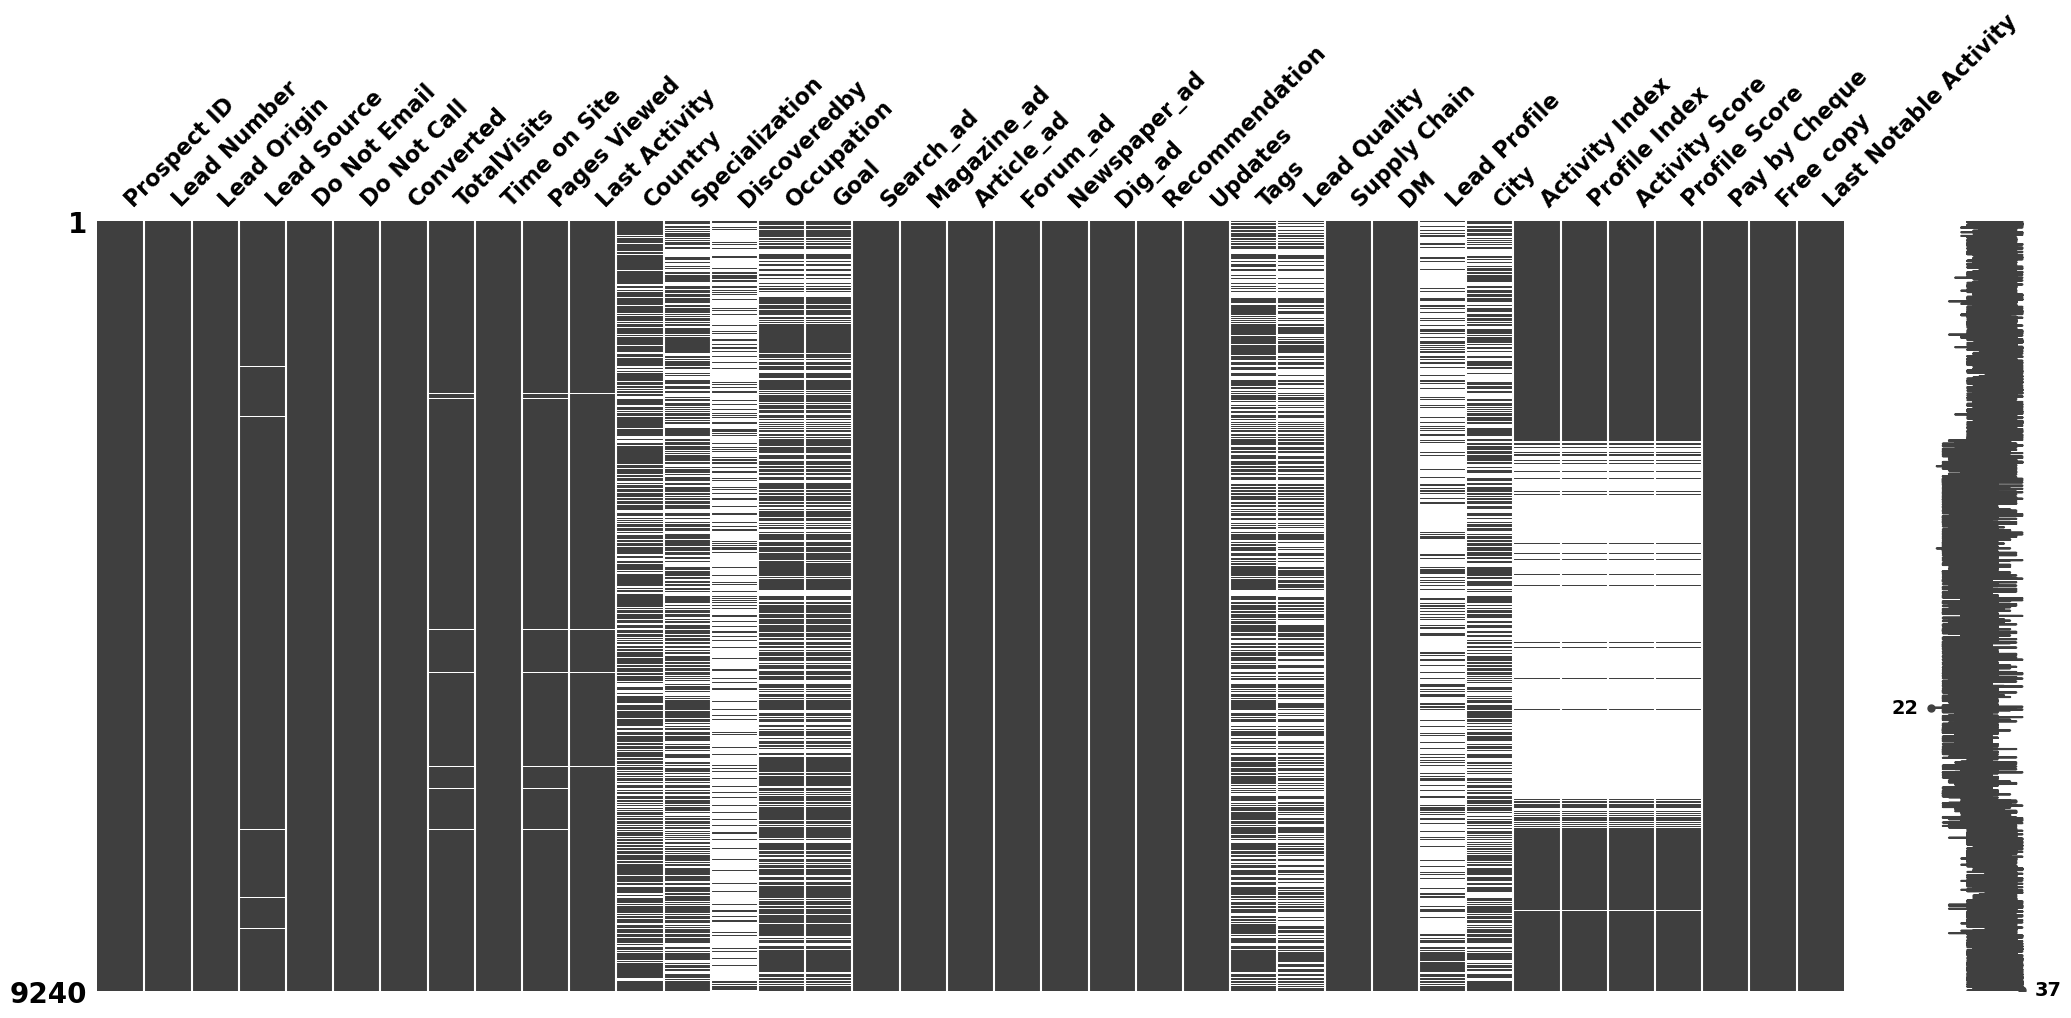

In [9]:
# Visualizing the missing values
msno.matrix(df)
plt.show()

Based on the visualization, it is evident that some variables have significant missing values. Following industry standards, we will drop the columns that contain more than 30% missing values. Although these columns may appear important, imputing the missing data could lead to unreliable results.

### 3.1. Handling missing values - Dropping

In [10]:
# Assigning the columns to drop - > 30% missing values
col_to_drop = round((df.isnull().sum() / df.shape[0]) * 100 , 2)[round((df.isnull().sum() / df.shape[0]) * 100 , 2) > 30 ].index

# 1. Dropping the columns - > 30% missing values
df.drop(col_to_drop , axis = 1 , inplace = True)

# 2. Dropping Prospect ID and Lead Number as they are some unique values assigned
df.drop(['Prospect ID' , 'Lead Number'], inplace = True , axis = 1)

# Verify
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Time on Site', 'Pages Viewed',
       'Last Activity', 'Country', 'Occupation', 'Goal', 'Search_ad',
       'Magazine_ad', 'Article_ad', 'Forum_ad', 'Newspaper_ad', 'Dig_ad',
       'Recommendation', 'Updates', 'Supply Chain', 'DM', 'Pay by Cheque',
       'Free copy', 'Last Notable Activity'],
      dtype='object')

In [11]:
# Viewing the null values
round((df.isnull().sum()[df.isnull().sum()>0] / df.shape[0]) * 100 , 2)

Lead Source       0.39
TotalVisits       1.48
Pages Viewed      1.48
Last Activity     1.11
Country          26.63
Occupation       29.11
Goal             29.32
dtype: float64

### 3.2. Handling missing values - Imputing

#### 3.2.1. Imputing Categorical Columns

In [12]:
# 1. Imputing - 'Last Activity' , 'Lead Source'
# Finding mode
col_to_imp = ['Last Activity' , 'Lead Source']
for _ in col_to_imp:
    df[_][df[_].isnull()] = df[_].mode()[0]

# Verify
round((df.isnull().sum()[df.isnull().sum()>0] / df.shape[0]) * 100 , 2)

TotalVisits      1.48
Pages Viewed     1.48
Country         26.63
Occupation      29.11
Goal            29.32
dtype: float64

In [13]:
# 2. Imputing - 'Country' Column
# Viewing the variable distribution in percent
round(df.Country.value_counts()/df.shape[0]*100 , 2).head()

Country
India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
Name: count, dtype: float64

In [14]:
# Finding the Cities for the rows that is missing Country 
df_backup.City[(df['Country'].isnull()) & (df_backup['City'].notnull()) & (df_backup['City'] != 'Select')].value_counts()

City
Mumbai                         211
Thane & Outskirts               80
Other Cities                    55
Other Cities of Maharashtra     43
Other Metro Cities              15
Tier II Cities                   2
Name: count, dtype: int64

After analyzing the cities associated with the missing country values, we can confidently impute entries for cities like Mumbai, Thane, and Maharashtra as "India" due to their clear association with Indian geography. Given that most values fall under India, we will impute the remaining missing values as "India."

In [15]:
#  Imputing the null vlaues in Country column
df.Country[df.Country.isnull()] ='India'

# Verify
round((df.isnull().sum()[df.isnull().sum()>0] / df.shape[0]) * 100 , 2)

TotalVisits      1.48
Pages Viewed     1.48
Occupation      29.11
Goal            29.32
dtype: float64

In [16]:
# 3. Imputing -  'Occupation'
# Missing values percentage
print('Missing values percent for Occupation  : ', round(df.Occupation.isnull().sum()/df.shape[0]*100 , 2), '% \n')

# Viewing the variable distribution in percent
round(df.Occupation.value_counts()/df.shape[0]*100 , 2)

Missing values percent for Occupation  :  29.11 % 



Occupation
Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: count, dtype: float64

The data indicates that approximately 60% of the 'Occupation' entries are labeled as "Unemployed." Given this significant proportion, we will impute all missing values around 30% with "Unemployed." This decision is based on the majority representation, which helps simplify our analysis and maintain consistency in the dataset.

In [17]:
# Imputing the null values of Occupation
df.Occupation[df.Occupation.isnull()] = 'Unemployed'

# Verify
round((df.isnull().sum()[df.isnull().sum()>0] / df.shape[0]) * 100 , 2)

TotalVisits      1.48
Pages Viewed     1.48
Goal            29.32
dtype: float64

In [18]:
# 4. Imputing - 'Goal' Column
# Viewing the distribution in goal column
df.Goal.value_counts()

Goal
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

For the 'Goal' column, the clear mode is "Better Career Prospects," which accounts for the majority of the entries. Therefore, we will impute the missing values with this mode.

In [19]:
# Imputing Goal Column
df.Goal[df.Goal.isnull()] = df.Goal.mode()[0]

# Verify
round((df.isnull().sum()[df.isnull().sum()>0] / df.shape[0]) * 100 , 2)

TotalVisits     1.48
Pages Viewed    1.48
dtype: float64

#### 3.2.2 Imputing Numerical Columns

In [20]:
# 5. Imputing - 'TotalVisits' , 'Pages Viewed'
# Viewing the distribution of the numeric variables to impute
TotalVisittab = df.TotalVisits[df.TotalVisits.notnull()].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])
PagesViewedtab = df['Pages Viewed'][df['Pages Viewed'].notnull()].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])
num_col_to_imp = pd.concat([TotalVisittab , PagesViewedtab] , axis = 1)
print(num_col_to_imp)

       TotalVisits  Pages Viewed
count  9103.000000   9103.000000
mean      3.445238      2.362820
std       4.854853      2.161418
min       0.000000      0.000000
25%       1.000000      1.000000
50%       3.000000      2.000000
75%       5.000000      3.000000
90%       7.000000      5.000000
95%      10.000000      6.000000
99%      17.000000      9.000000
max     251.000000     55.000000


Based on the analysis, it is clear that both variables contain significant outliers. Therefore, we will impute the missing values with the median to mitigate the influence of these outliers.

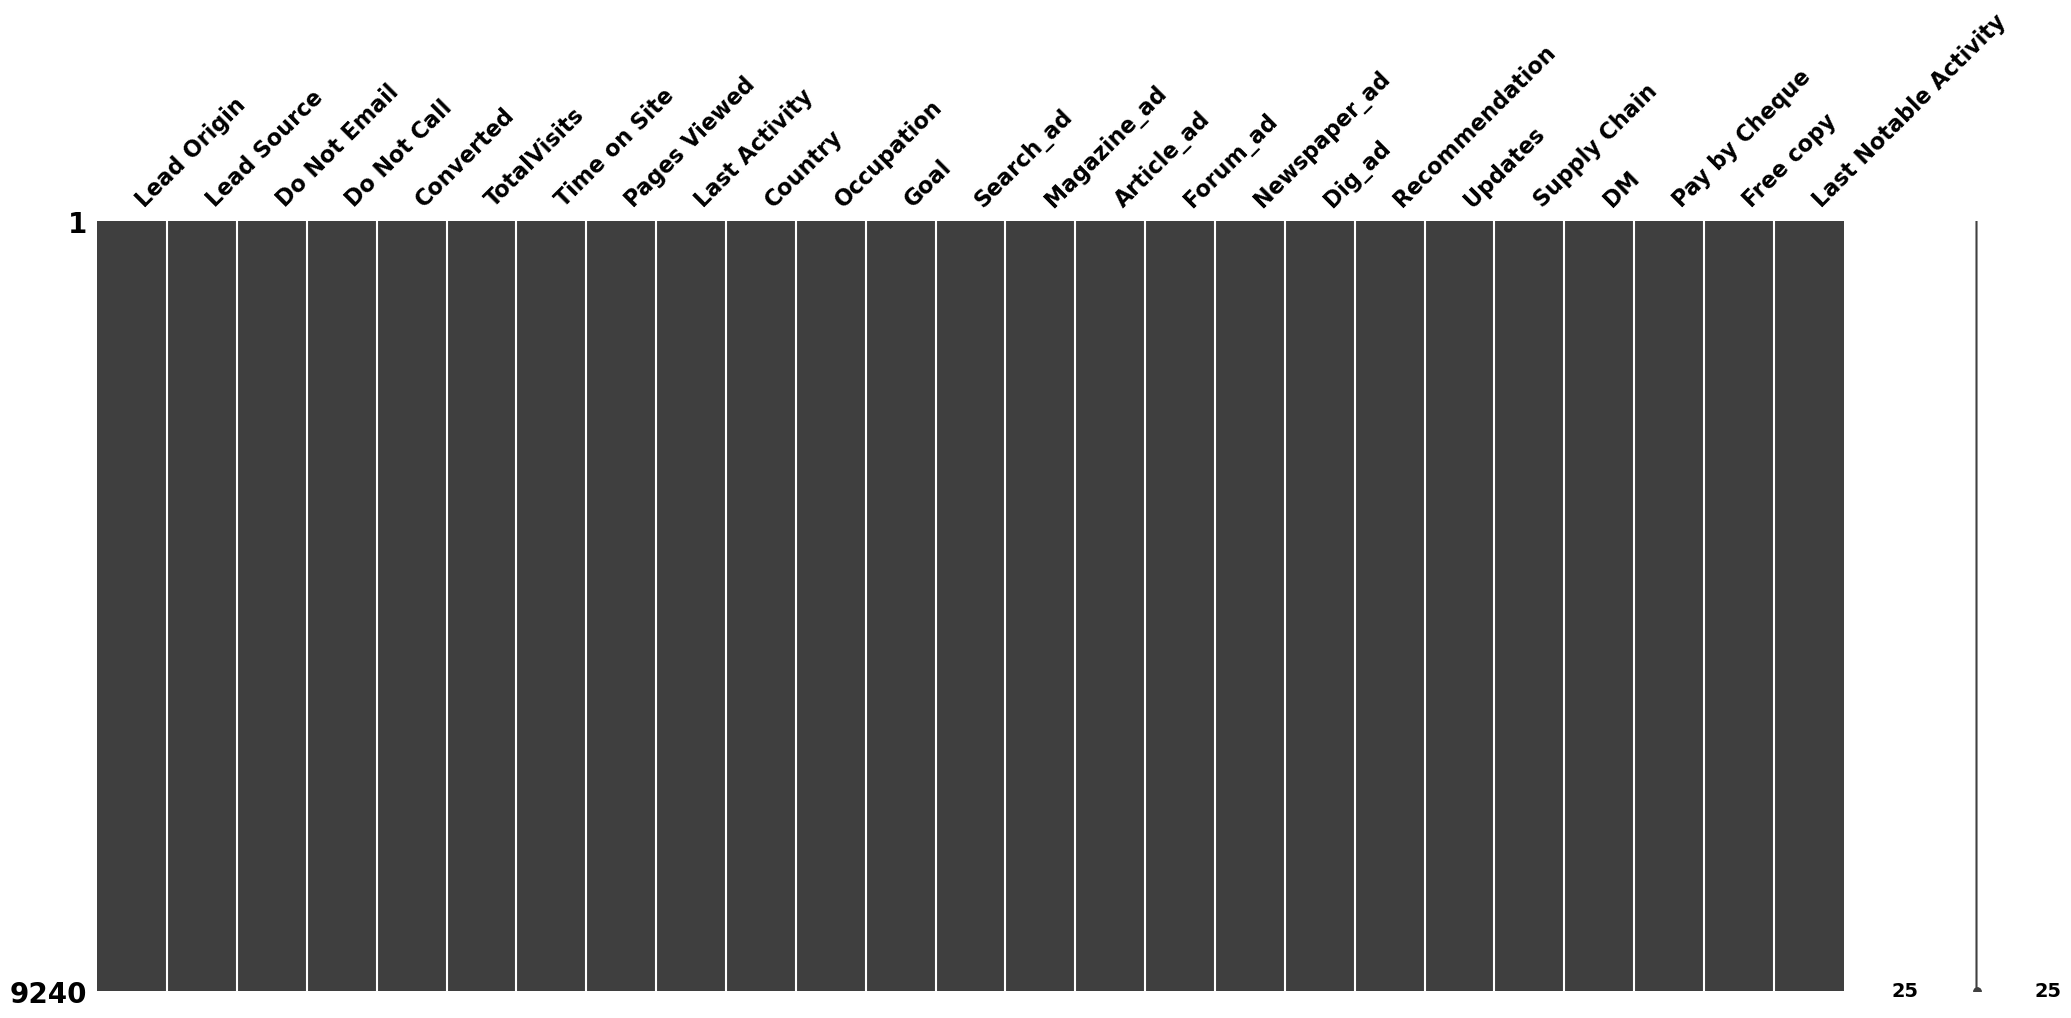

In [21]:
# Assigning the numerical columns to a variable
col_to_imp = ['TotalVisits' , 'Pages Viewed']

for _ in col_to_imp:
    df[_][df[_].isnull()] = df[_].median()

# Verify
msno.matrix(df)
plt.show()

### 3.3. Handling Duplicates and Grouping

We could notice a few columns has duplicate values, let's address them, this will help us to reduce the no of columns while encoding

In [22]:
## Lead Source
# 1. Merging 'Google' & 'google' & 'Bing' & 'Organic Search'entries as 'Search Engines'
df['Lead Source'][(df['Lead Source'] == 'google') | (df['Lead Source'] == 'Google')| (df['Lead Source'] == 'bing')|
(df['Lead Source'] == 'Organic Search')] = 'Search Engines'
# 2. Merging 'Olark Chat' entries as 'Live Chat'
df['Lead Source'][df['Lead Source'] == 'Olark Chat'] = 'Live Chat'
# 3. Merging 'Reference' entries as 'Referral Sites'
df['Lead Source'][df['Lead Source'] == 'Reference'] = 'Referral Sites'
# 4. Merging 'Facebook' & 'youtubechannel' entries as 'Social Media'
df['Lead Source'][(df['Lead Source'] == 'Facebook') | (df['Lead Source'] == 'youtubechannel')] = 'Social Media'
# 5. Merging 'welearnblog_Home' & 'WeLearn' & 'blog' entries as 'Welingak Website'
df['Lead Source'][(df['Lead Source'] == 'welearnblog_Home') | (df['Lead Source'] == 'WeLearn')| (df['Lead Source'] == 'blog')] \
= 'Welingak Website'
# 6. Merging 'Click2call' & 'Press_Release' & 'Pay per Click Ads' & 'testone' & 'NC_EDM' entries as 'Other Sources'
df['Lead Source'][df['Lead Source'].isin(['Pay per Click Ads', 'Click2call','Press_Release','NC_EDM','testone'])] = 'Other Sources'

In [23]:
## Last Activity
# Consolidating categories with fewer than 10 occurrences into an 'Other' category for better analysis
df['Last Activity'][df['Last Activity'].isin(['Approached upfront', 'View in browser link Clicked' , 'Email Received', 'Email Marked Spam',
                                             'Visited Booth in Tradeshow' , 'Resubscribed to emails'])] = 'Others'

In [24]:
## Last Notable Activity
# Consolidating categories with fewer than 10 occurrences into an 'Other' category for better analysis
df['Last Notable Activity'][df['Last Notable Activity'].\
isin(df['Last Notable Activity'].value_counts()[df['Last Notable Activity'].value_counts()<15].index)] = 'Others'

In [25]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Unsubscribed                 47
Unreachable                  32
Others                       21
Name: count, dtype: int64

In [26]:
## Country
# 1. Grouping Asian Regions
df['Country'][df['Country'].isin(['India','Singapore', 'Hong Kong', 'Philippines', 'Asia/Pacific Region', 'Bangladesh',
                                  'China', 'Sri Lanka', 'Malaysia' , 'Vietnam', 'Indonesia'])] = 'Asia'
# 2. Grouping North American Regions
df['Country'][df['Country'].isin(['United States', 'Canada'])] = 'America'
# 3. Grouping Middle East Regions
df['Country'][df['Country'].isin(['United Arab Emirates', 'Saudi Arabia', 'Qatar', 'Bahrain', 'Oman', 'Kuwait'])] = 'Middle_East'
# 4. Grouping European Regions
df['Country'][df['Country'].isin(['United Kingdom', 'France', 'Germany' , 'Sweden', 'Italy', 'Netherlands', 'Belgium', 
                                  'Switzerland', 'Denmark', 'Russia'])] = 'Europe'
# 5. Grouping Australian Regions
df['Country'][df['Country'].isin(['Australia'])] = 'Australia'
# 6. Grouping African Regions
df['Country'][df['Country'].isin(['South Africa', 'Nigeria', 'Uganda', 'Ghana','Kenya', 'Tanzania','Liberia'])] ='Africa'

Since the 'Country' column has been grouped together as region, let us rename the column as 'Region'.

In [27]:
# Renaming 'Country' column
df.rename(columns = {'Country' : 'Region'}, inplace = True)

# Verify
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time on Site,Pages Viewed,Last Activity,Region,...,Forum_ad,Newspaper_ad,Dig_ad,Recommendation,Updates,Supply Chain,DM,Pay by Cheque,Free copy,Last Notable Activity
0,API,Live Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Asia,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Search Engines,No,No,0,5.0,674,2.5,Email Opened,Asia,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Asia,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Asia,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Search Engines,No,No,1,2.0,1428,1.0,Converted to Lead,Asia,...,No,No,No,No,No,No,No,No,No,Modified


Now that we have addressed all the missing values and grouping issues, let's proceed to the Exploratory Data Analysis (EDA) phase.

## 4. Exploratory Data Analysis (EDA)

### 4.1. Univariate Analysis

#### 4.1.1. Categorical Variables

The target variable 'Converted' is currently in integer format. Let's convert it to a categorical type to facilitate our analysis.

In [28]:
# Converting Categorical to object type
df.Converted = df.Converted.astype('object')

# Viewing the categorical variables
df.select_dtypes("O").head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Last Activity,Region,Occupation,Goal,Search_ad,...,Forum_ad,Newspaper_ad,Dig_ad,Recommendation,Updates,Supply Chain,DM,Pay by Cheque,Free copy,Last Notable Activity
0,API,Live Chat,No,No,0,Page Visited on Website,Asia,Unemployed,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Search Engines,No,No,0,Email Opened,Asia,Unemployed,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,Email Opened,Asia,Student,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,Unreachable,Asia,Unemployed,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Search Engines,No,No,1,Converted to Lead,Asia,Unemployed,Better Career Prospects,No,...,No,No,No,No,No,No,No,No,No,Modified


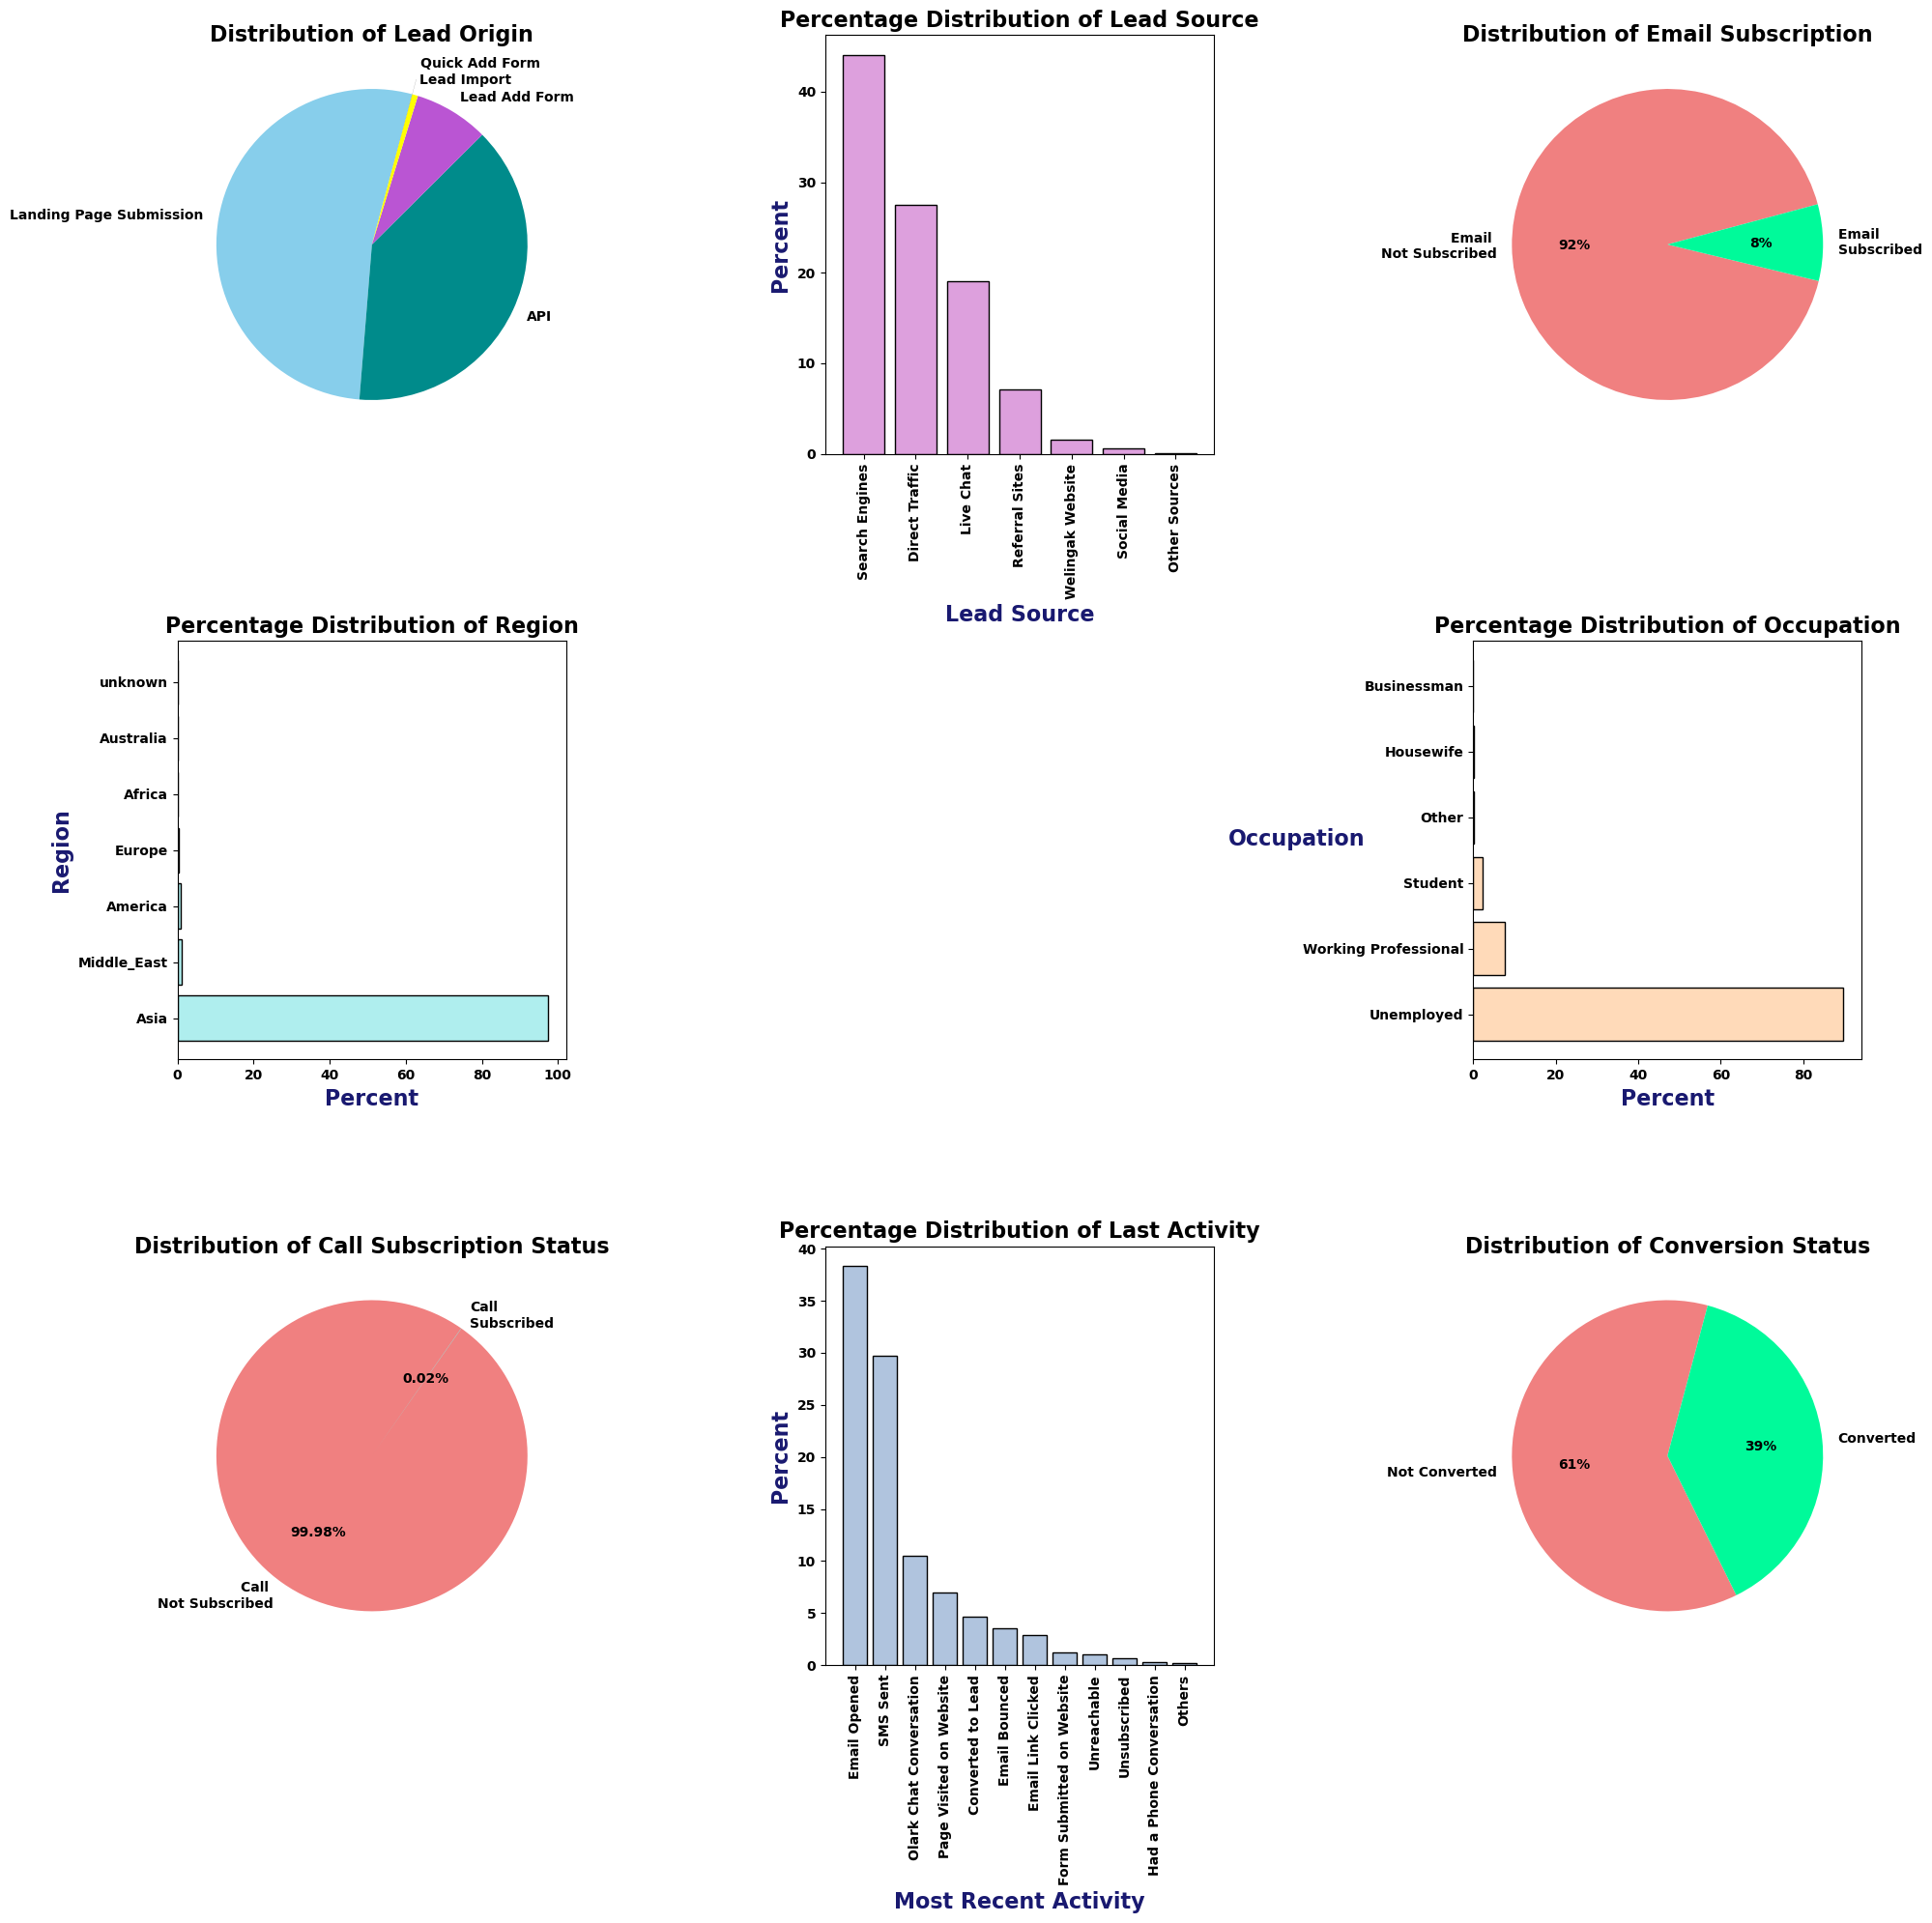

In [29]:
## Visualizing categorical variables - First batch

plt.figure(figsize=(20,20))

# 1. Lead Origin
exp = [0,0,0,0,0.1]
plt.subplot(331)
plt.pie(df['Lead Origin'].value_counts(), labels = df['Lead Origin'].value_counts().index ,explode = exp, startangle = 75,
       colors = ['skyblue', 'darkcyan', 'mediumorchid', 'yellow', 'black'])
plt.title('Distribution of Lead Origin', fontsize=16)

# 2. Lead Source
plt.subplot(332)
plt.bar(height = (df['Lead Source'].value_counts().values/9240)*100, x = df['Lead Source'].value_counts().index, color = 'plum', edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel('Lead Source', color = 'midnightblue', fontsize = 16)
plt.ylabel('Percent', color = 'midnightblue', fontsize = 16)
plt.title('Percentage Distribution of Lead Source',fontsize=16)

# 3. Do Not Email
plt.subplot(333)
plt.pie(df['Do Not Email'].value_counts().values , labels = ['Email \nNot Subscribed' , 'Email \nSubscribed'] , startangle = 15 , autopct='%1.f%%'
       , colors = ['lightcoral','mediumspringgreen'])
plt.title('Distribution of Email Subscription',fontsize=16)

# 4. Do Not Call
plt.subplot(337)
plt.pie(df['Do Not Call'].value_counts().values , labels = ['Call \nNot Subscribed' , 'Call\nSubscribed'], autopct='%1.2f%%', startangle = 55
       , colors = ['lightcoral','#40E0D0'])
plt.title('Distribution of Call Subscription Status',fontsize=16)

# 5. Converted
plt.subplot(339)
plt.pie(df['Converted'].value_counts().values , labels = ['Not Converted' , 'Converted'] , startangle = 75,
        autopct = '%1.f%%', colors = ['lightcoral','mediumspringgreen'])
plt.title('Distribution of Conversion Status',fontsize=16)

# 6. Region
plt.subplot(334)
region = (df['Region'].value_counts()/9240)*100
plt.barh(width = region.values ,y = region.index, color = 'paleturquoise', edgecolor = 'black')
plt.ylabel('Region', color = 'midnightblue', fontsize = 16)
plt.xlabel('Percent', color = 'midnightblue', fontsize = 16)
plt.title('Percentage Distribution of Region',fontsize=16)

# 7. Last Activity
plt.subplot(338)
activity = (df['Last Activity'].value_counts()/9240)*100
plt.bar(height = activity.values ,x = activity.index, color = 'lightsteelblue' , edgecolor = 'black')
plt.xlabel('Most Recent Activity', color = 'midnightblue', fontsize = 16)
plt.xticks(rotation = 90)
plt.ylabel('Percent', color = 'midnightblue', fontsize = 16)
plt.title('Percentage Distribution of Last Activity',fontsize=16)

# 8. Occupation
plt.subplot(336)
occupation = df['Occupation'].value_counts()/9240*100 
plt.barh(width = occupation.values ,y = occupation.index, color = 'peachpuff', edgecolor = 'black')
plt.ylabel('Occupation', rotation =0 , color = 'midnightblue', fontsize = 16)
plt.xlabel('Percent', color = 'midnightblue', fontsize = 16)
plt.title('Percentage Distribution of Occupation',fontsize=16)

plt.tight_layout()
plt.show()

**Observations:**
1. Distribution of Lead Origin
   - The majority of lead origins come from 'Landing Page Submission,' followed by 'API,' whereas 'Quick Add Form' has negligible value and can be disregarded.<br><br>
2. Percentage distribution of Lead Source
    - The primary lead sources are Search Engines and Direct Traffic, followed by Live Chat, while Social Media and other sources generated relatively few leads.<br><br>

3. Distribution of Email subscription and call subscription status
    - Ninety-two percent of individuals chose not to receive emails, which is a better outcome compared to calls, where approximately 99.98% opted out. This likely indicates a concern about spamming.
   - Since Do not call has lesser variation, it will be dropped further<br><br>

4. Distribution of Conversion Status - Target Variable
    - There is an imbalance in the data, with only about 39% of individuals successfully converting, this imbalance will be addressed through scaling<br><br>

5. Percentage Distribution of Region
    - The company has a majority of its customers in the Asian region, likely due to its base in India.<br><br>

6. Percentage Distribution of Occupation
    - Primarily, unemployed individuals tend to join the edtech platform, likely to enhance their skills and advance their careers.<br><br>
  
7. Percentage Distribution of Last Activity
    - There is a significant drop-off in frequency after the top few activities. The chart shows a clear decline in the height of the bars as we move down the list of activities. This suggests that a small number of activities account for a large portion of the total last activities, while the remaining activities are less frequent.
    - Email Opened is the most common last activity. 

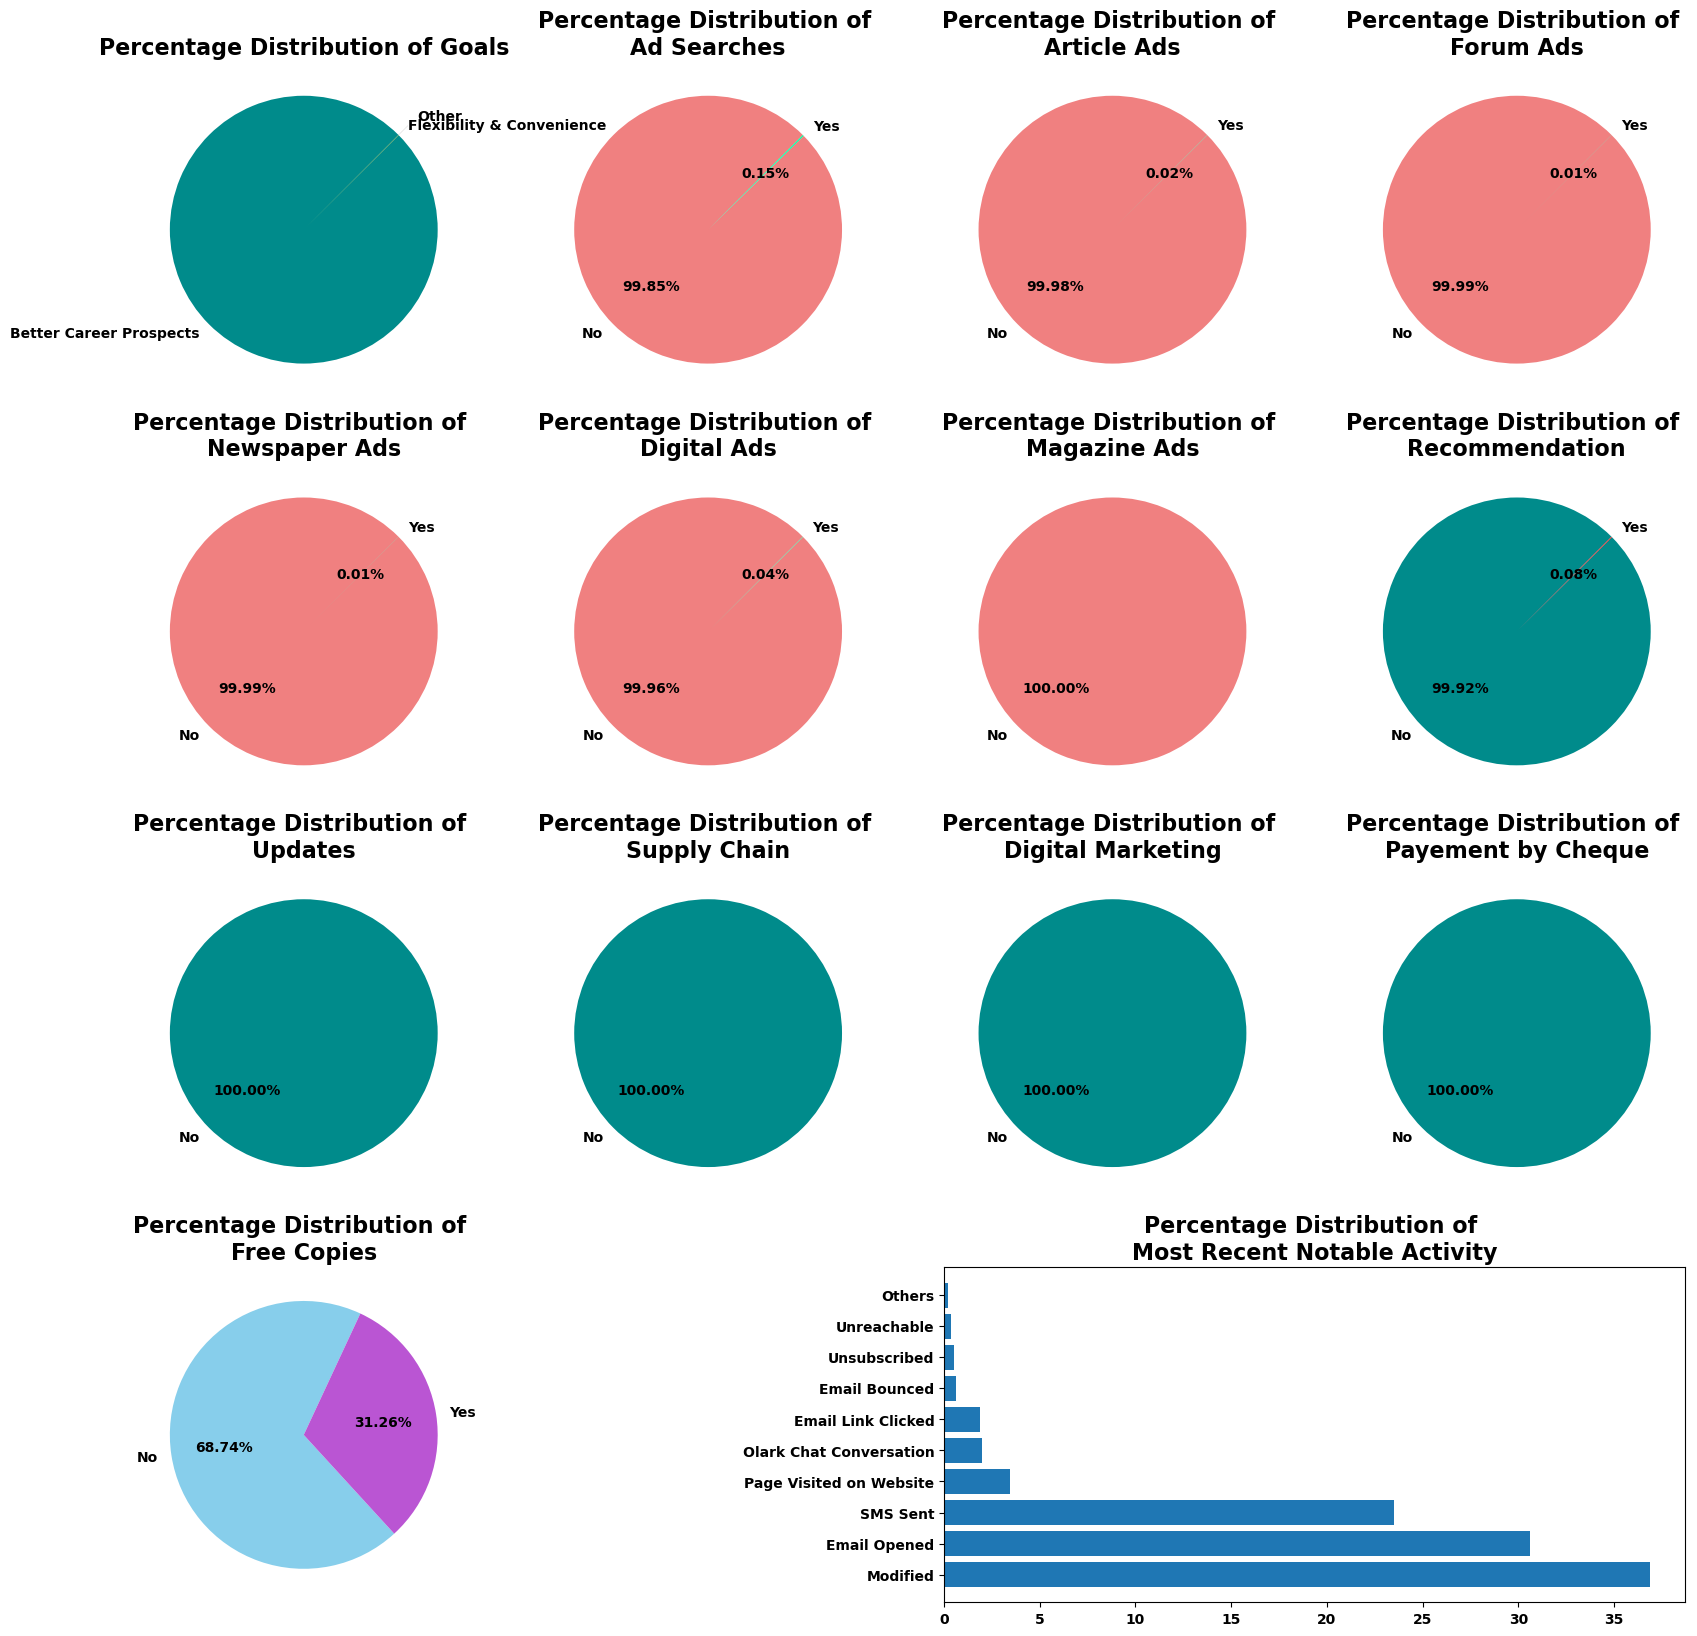

In [30]:
## Visualizing categorical variables - Last batch
# Create a figure with constrained layout
plt.figure(figsize=(20,20))

# 1. Goal
plt.subplot(4,4,1)
exp = [0,0,0.1]
plt.pie(df['Goal'].value_counts() ,labels = df['Goal'].value_counts().index , explode = exp, startangle = 45, colors = ['darkcyan', 'yellow', 'black'])
plt.title('Percentage Distribution of Goals',fontsize=16)

# 2. Search_ad
plt.subplot(4,4,2)
search = (df['Search_ad'].value_counts()/9240)*100
plt.pie( search ,labels = search.index , startangle = 45, autopct = '%1.2f%%', colors = ['lightcoral','mediumspringgreen'])
plt.title('Percentage Distribution of \nAd Searches',fontsize=16)

# 3. Article_ad
plt.subplot(4,4,3)
article = (df['Article_ad'].value_counts()/9240)*100
plt.pie( article ,labels = article.index , startangle = 45, autopct = '%1.2f%%', colors = ['lightcoral','mediumspringgreen'])
plt.title('Percentage Distribution of \nArticle Ads',fontsize=16)

# 4. Forum_ad
plt.subplot(4,4,4)
forum = (df['Forum_ad'].value_counts()/9240)*100
plt.pie( forum ,labels = forum.index , startangle = 45, autopct = '%1.2f%%', colors = ['lightcoral','mediumspringgreen'])
plt.title('Percentage Distribution of \nForum Ads',fontsize=16)

# 5. Newspaper_ad
plt.subplot(4,4,5)
newspaper = (df['Newspaper_ad'].value_counts()/9240)*100
plt.pie( newspaper ,labels = newspaper.index , startangle = 45, autopct = '%1.2f%%', colors = ['lightcoral','mediumspringgreen'])
plt.title('Percentage Distribution of \nNewspaper Ads',fontsize=16)

# 6. Dig_ad
plt.subplot(4,4,6)
dig = (df['Dig_ad'].value_counts()/9240)*100
plt.pie( dig ,labels = dig.index , startangle = 45, autopct = '%1.2f%%', colors = ['lightcoral','mediumspringgreen'])
plt.title('Percentage Distribution of \nDigital Ads',fontsize=16)

# 7. Magazine_ad
plt.subplot(4,4,7)
magazine = (df['Magazine_ad'].value_counts()/9240)*100
plt.pie( magazine ,labels = magazine.index , startangle = 45, autopct = '%1.2f%%', colors = ['lightcoral','mediumspringgreen'])
plt.title('Percentage Distribution of \nMagazine Ads',fontsize=16)

# 8. Recommendation
plt.subplot(4,4,8)
recom = (df['Recommendation'].value_counts()/9240)*100
plt.pie( recom ,labels = recom.index , startangle = 45, autopct = '%1.2f%%', colors = ['darkcyan', 'red'])
plt.title('Percentage Distribution of \nRecommendation',fontsize=16)

# 9. Updates
plt.subplot(4,4,9)
updates = (df['Updates'].value_counts()/9240)*100
plt.pie( updates ,labels = updates.index , startangle = 45, autopct = '%1.2f%%', colors = ['darkcyan', 'red'])
plt.title('Percentage Distribution of \nUpdates',fontsize=16)

# 10. Supply Chain
plt.subplot(4,4,10)
supply = (df['Supply Chain'].value_counts()/9240)*100
plt.pie( supply ,labels = supply.index , startangle = 45, autopct = '%1.2f%%', colors = ['darkcyan', 'red'])
plt.title('Percentage Distribution of \nSupply Chain',fontsize=16)

# 11. DM
plt.subplot(4,4,11)
dm = (df['DM'].value_counts()/9240)*100
plt.pie( dm ,labels = dm.index , startangle = 45, autopct = '%1.2f%%', colors = ['darkcyan', 'red'])
plt.title('Percentage Distribution of \nDigital Marketing',fontsize=16)

# 12. Pay by Cheque
plt.subplot(4,4,12)
cheque = (df['Pay by Cheque'].value_counts()/9240)*100
plt.pie( cheque ,labels = cheque.index , startangle = 45, autopct = '%1.2f%%', colors = ['darkcyan', 'red'])
plt.title('Percentage Distribution of \nPayement by Cheque',fontsize=16)

# 13. Free Copy
plt.subplot(4,4,13)
copy = (df['Free copy'].value_counts()/9240)*100
plt.pie( copy ,labels = copy.index , startangle = 65, autopct = '%1.2f%%', colors = ['skyblue', 'mediumorchid'])
plt.title('Percentage Distribution of \nFree Copies',fontsize=16)

# 14. Last Notable Activity
plt.subplot(4,4,(15,16))
note = (df['Last Notable Activity'].value_counts()/9240)*100
plt.barh( width = note.values ,y = note.index)
plt.title('Percentage Distribution of \nMost Recent Notable Activity',fontsize=16)
plt.show()

**Observations:**
  
1.  Last Notable Activity
   - We can observe several variations in the "Most Recent Notable Activity Chart":
        - The high percentage of "Modified" might indicate frequent data updates or changes in user profiles.
        - The prominence of "Email Opened" suggests the effectiveness of email marketing.
        -  The significant portion for "SMS Sent" could imply SMS as a preferred communication channel.

2. Free Copies
   - Free copies received a better response compared to other ad styles with 31% subscription.<br><br>

3. Other plots
   - The other features show minimal variation, with over 95% of each category dominated by a single category. This lack of meaningful insight could negatively impact our logistic regression model, so we should drop the variables with little to no variability.

In [31]:
# Dropping the features with less/no variations
df.drop(['Magazine_ad', 'Search_ad', 'Article_ad', 'Forum_ad', 'Newspaper_ad','Dig_ad', 'Do Not Call', 'Goal', 
         'Recommendation', 'Updates', 'Supply Chain', 'DM' , 'Pay by Cheque'] , axis = 1 , inplace = True)


# Let us convert back the data type of 'Target variable - Converted' to int
df['Converted'] = df['Converted'].astype('int')

# Verify
df.dtypes

Lead Origin               object
Lead Source               object
Do Not Email              object
Converted                  int32
TotalVisits              float64
Time on Site               int64
Pages Viewed             float64
Last Activity             object
Region                    object
Occupation                object
Free copy                 object
Last Notable Activity     object
dtype: object

#### 4.1.2. Numerical Variables

In [32]:
df.select_dtypes(['int', 'float']).columns

Index(['Converted', 'TotalVisits', 'Time on Site', 'Pages Viewed'], dtype='object')

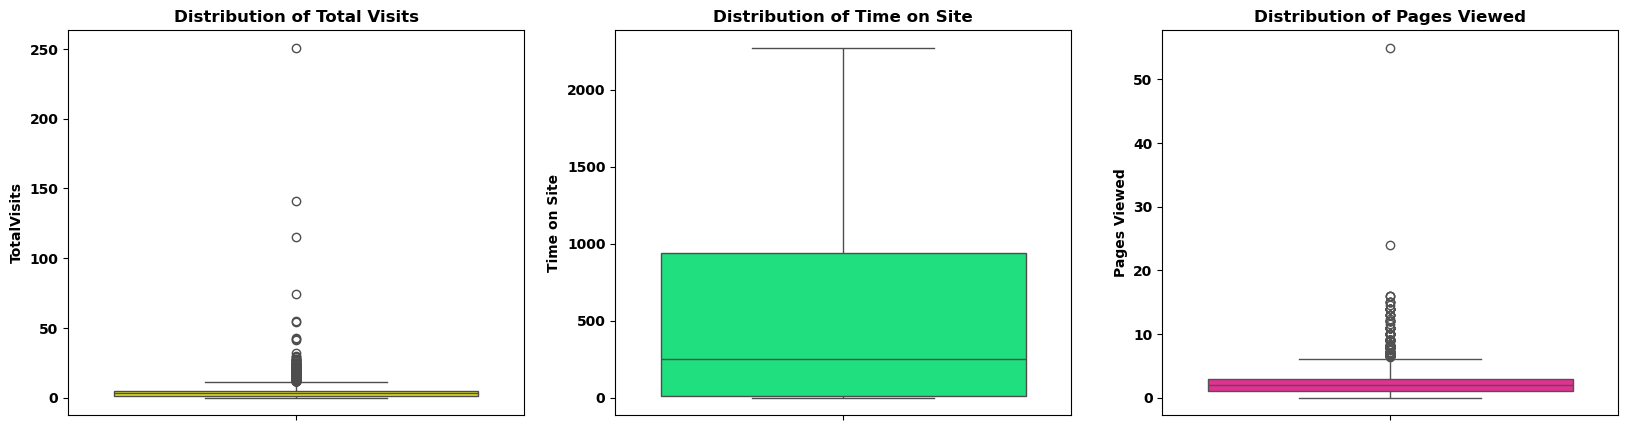

In [33]:
## Visualizing numerical variables
def fun_box():
    plt.figure(figsize = (20, 5))
    
    # 1. TotalVisits
    plt.subplot(1,3,1)
    sns.boxplot(df.TotalVisits, color = 'yellow')
    plt.title('Distribution of Total Visits')
    
    # 2. Time on Site
    plt.subplot(1,3,2)
    sns.boxplot(df['Time on Site'] , color = 'springgreen')
    plt.title('Distribution of Time on Site')
    
    # 3. Pages Viewed
    plt.subplot(1,3,3)
    sns.boxplot(df['Pages Viewed'], color = 'deeppink')
    plt.title('Distribution of Pages Viewed')
    
    plt.show()
    
    return None

# Calling the function to plot the numerical variables
fun_box()

From the chart, it's evident that both Total Visits and Pages Viewed exhibit significant outliers. Inorder to build a well-performing model, we should remove these outliers.

`                                                             Handling Outliers:                                                                       `

In [34]:
# Handling Outliers - Total Visit
print('No of values more than 30 in Total Visits : ', df[df['TotalVisits']>9].count()[0])
print('Percentage of values less than 8 :' , round((467/9240)*100,2) , '%')

No of values more than 30 in Total Visits :  467
Percentage of values less than 8 : 5.05 %


After visualizing with various thresholds, we found that values below 8 have no outliers. However, removing these would result in the loss of 467 rows, which accounts for only 5% of the total data. Therefore, we will proceed with dropping the outliers.

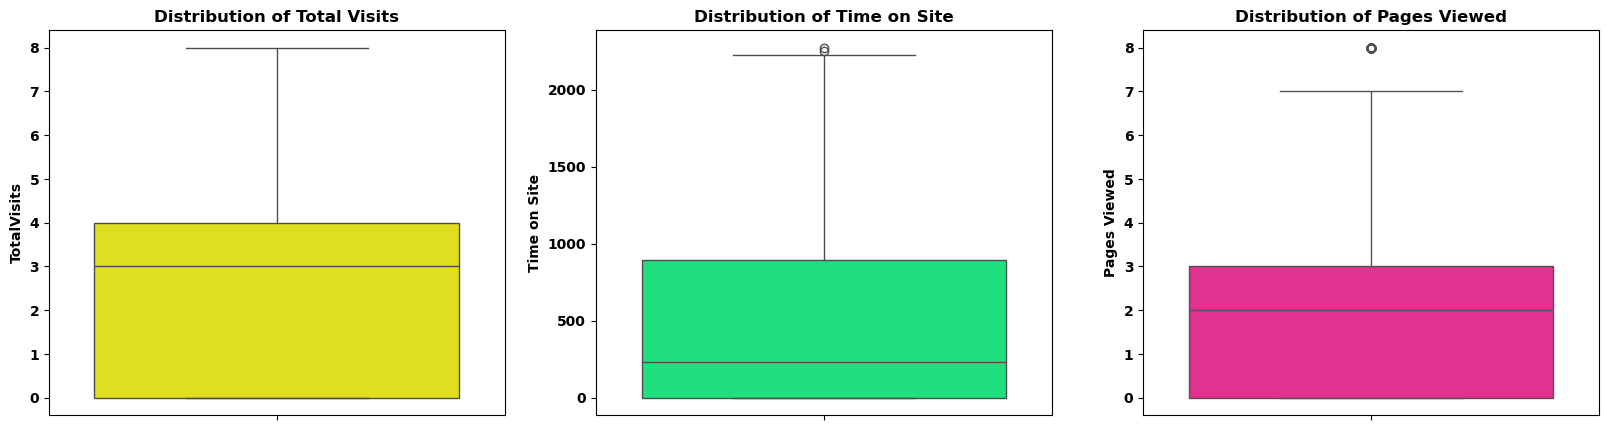

In [35]:
# Dropping outliers
df  = df[df['TotalVisits']<9]

# Resetting index
df.reset_index( drop = True , inplace = True)

# Verify
fun_box()

The significant outliers in 'Pages Viewed' have also been addressed following the adjustments made for 'Total Visits,' resulting in a continuous dataset that is now well-suited for Logistic Regression without the influence of outliers.

### 4.2. Bivariate Analysis

4.2.1. Categorical vs Target variable

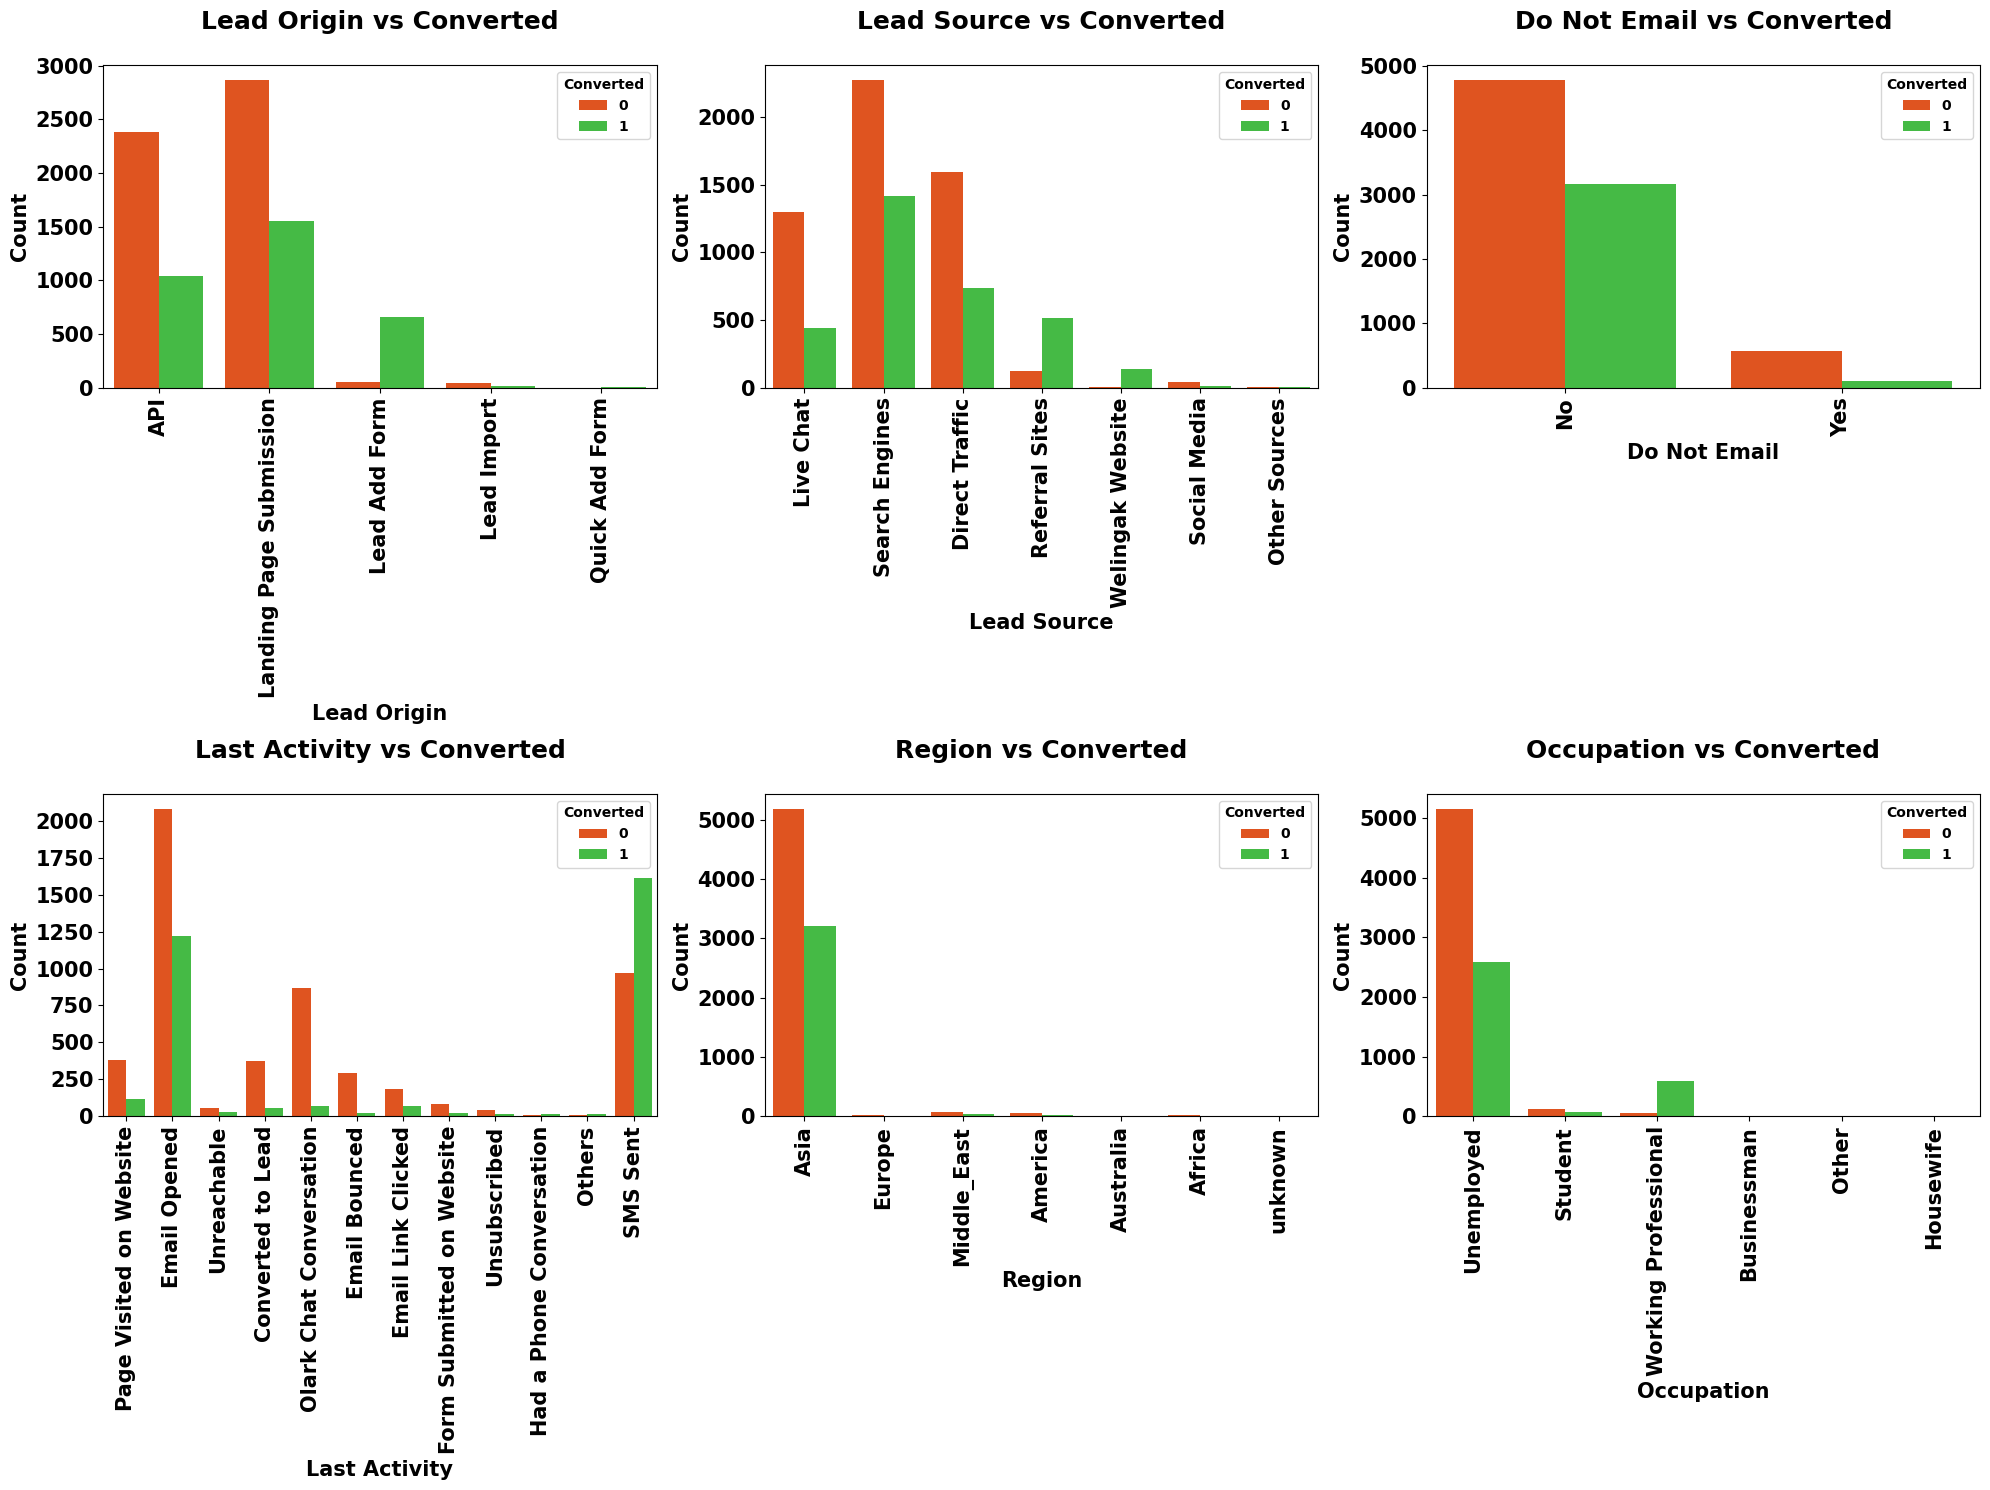

In [36]:
# Creating a Loop to repeat the countplot for all categorical variables with Target variable
plt.figure(figsize = (20 ,15))
cat_var = df.select_dtypes('O').columns

# Loop to plot the charts
for _ in range(0, 6):
    x = _+1
    plt.subplot(2,3,x)
    sns.countplot(x=cat_var[_], hue='Converted', data=df, palette = ['orangered' , 'limegreen'] )
    plt.xticks(rotation = 90, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel( cat_var[_], fontsize = 15)
    plt.ylabel( 'Count', fontsize = 15)
    plt.title( cat_var[_]+ ' vs Converted\n', fontsize = 18)

# Formatting the layout and visualizing
plt.tight_layout()
plt.show()

- The chart clearly indicates that the number of "No" responses exceeds "Yes" responses across all features and categories, except for SMS. This suggests that SMS is an effective method for boosting the conversion rate.
- Also "Working Professionals" exhibit a higher conversion rate compared to other categories.
- Additionally, between the two variables—**Last Activity** and **Last Notable Activity**—the **Last Activity** variable exhibits greater variation in its values, suggesting it may offer more diverse insights into user interactions.

### 4.3. Multi-variate Analysis

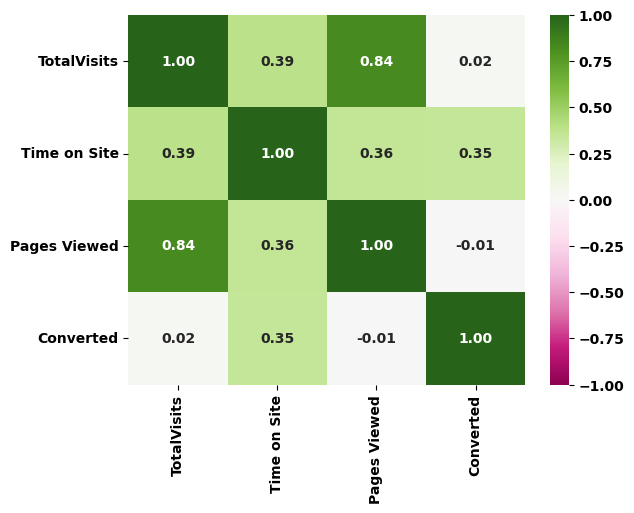

In [37]:
# 1. Target variable against other numerical variables
cor = df[['TotalVisits', 'Time on Site', 'Pages Viewed', 'Converted']].corr()
sns.heatmap(cor, annot = True, cmap = 'PiYG' , fmt = '0.2f', vmin = '-1')
plt.show()

From this, we understand that,
- There is no negative correlation among the numeric variables.
-  Total Visits and Pages Viewed show a high correlation of 0.84, which could result in multicollinearity. We'll decide which variable to drop and which one to use during feature selection.
-  The target variable has no strong correlation with any other variables


## 5. Data Preparation

Among the categorical variables 'Last Activity' and 'Last Notable Activity,' which appear quite similar, let's assess their correlation before moving on to encoding.

In [38]:
## Correlation check
# Encoding the variables
LA_coded = df['Last Activity'].astype('category').cat.codes
LNA_coded = df['Last Notable Activity'].astype('category').cat.codes

print('Percentage of correlation between the variables : ', round(LA_coded.corr(LNA_coded)*100 , 2) , '%')

Percentage of correlation between the variables :  77.25 %


- Due to high correlation between 'Last Activity' and 'Last Notable Activity', we risk introducing multicollinearity, which can negatively impact our model.
- Additionally, one-hot encoding these features could lead to an excessive number of columns, potentially compromising performance.
- To address these issues, we've decided to drop 'Last Notable Activity' as it exhibits less variability compared to 'Last Activity'. This will help improve our model's overall effectiveness.

In [39]:
# Dropping 'Last Notable Activity' Column
df.drop('Last Notable Activity' , inplace = True , axis = 1)

# Verify
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time on Site,Pages Viewed,Last Activity,Region,Occupation,Free copy
0,API,Live Chat,No,0,0.0,0,0.0,Page Visited on Website,Asia,Unemployed,No
1,API,Search Engines,No,0,5.0,674,2.5,Email Opened,Asia,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Asia,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Asia,Unemployed,No
4,Landing Page Submission,Search Engines,No,1,2.0,1428,1.0,Converted to Lead,Asia,Unemployed,No


In [40]:
# Binary Encoding for variables with yes or no values
def yesno(x):
    if x == 'Yes':
        return 1
    else:
        return 0
# 1. Do Not Email
df['Do Not Email'] = df['Do Not Email'].apply(yesno)

# 2. Free copy
df['Free copy'] = df['Free copy'].apply(yesno)

# Verify
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Time on Site,Pages Viewed,Last Activity,Region,Occupation,Free copy
0,API,Live Chat,0,0,0.0,0,0.0,Page Visited on Website,Asia,Unemployed,0
1,API,Search Engines,0,0,5.0,674,2.5,Email Opened,Asia,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Asia,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Asia,Unemployed,0
4,Landing Page Submission,Search Engines,0,1,2.0,1428,1.0,Converted to Lead,Asia,Unemployed,0


### 5.1. One-Hot Encoding

In [41]:
# Creating a function to convert the 'True' , 'False' values to 1s and 0s
def TF(x):
    if x == True:
        return 1
    else:
        return 0

In [42]:
# Getting the dummy variables
# 1. Lead Origin
dummy_Origin = pd.get_dummies(df['Lead Origin'], prefix ='Origin').iloc[:, :4].applymap(TF)

# 2. Lead Source
dummy_Source = pd.get_dummies(df['Lead Source'], prefix ='Source').applymap(TF)
dummy_Source.drop('Source_Other Sources' , inplace = True , axis = 1)

# 3. Region
dummy_Region = pd.get_dummies(df['Region']).applymap(TF)
dummy_Region.drop('unknown' , inplace = True , axis = 1)

# 4. Occupation
dummy_Job = pd.get_dummies(df['Occupation'], prefix = 'Job').iloc[: , 1:].applymap(TF)

# 5. Last Activity
dummy_LA = pd.get_dummies(df['Last Activity'], prefix = 'LA').applymap(TF)
dummy_LA.drop('LA_Others' , inplace = True , axis = 1)

#### 5.1.1 Merging the dataframes

In [43]:
# Merging the dummy dataframes with our data
df = pd.concat([df, dummy_Origin , dummy_Source, dummy_Region, dummy_Job, dummy_LA], axis =1)

# Verify shape
df.shape

(8609, 43)

Now, let's remove the original categorical columns, as the encoded values have been added to the DataFrame.

In [44]:
# Dropping Categorical variables
df.drop(df.select_dtypes('O').columns, inplace = True , axis =1)

# Verify Shape
df.head()

,Do Not Email,Converted,TotalVisits,Time on Site,Pages Viewed,Free copy,Origin_API,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,...,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.2. Train-Test Split

In [45]:
# Importing the required library
from sklearn.model_selection import train_test_split

In [46]:
# Splitting the Features and target variable
X = df.drop('Converted' , axis = 1)
y = df['Converted']

# Splitting the Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 7)

# Verify
print('Train data: \nX : {0} \ny : {1}\n\n'.format(X_train.shape , y_train.shape))
print('Test data: \nX : {0} \ny : {1}'.format(X_test.shape , y_test.shape))

Train data: 
X : (6456, 37) 
y : (6456,)


Test data: 
X : (2153, 37) 
y : (2153,)


### 5.3. Addressing Class Imbalance - SMOTE

In [47]:
# Importing necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

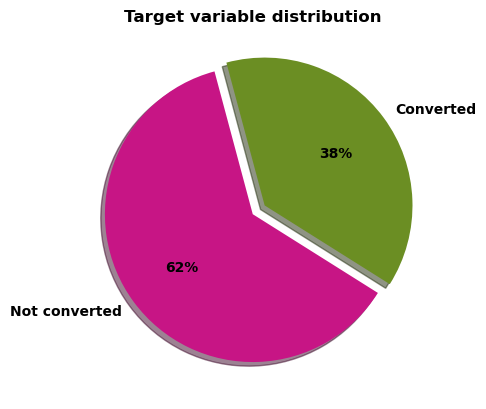

In [48]:
# Visulizing the class imbalance in training data set
imb = (y_train.value_counts()/y_train.value_counts().sum())*100
exp = [0.0, 0.1]
plt.pie(imb , shadow = True, explode = exp, startangle = 105, labels = ['Not converted' , 'Converted'] , colors = ['mediumvioletred' , 'olivedrab'], 
        autopct='%1.0f%%')
plt.title('Target variable distribution')
plt.show()

The class imbalance may result in unexpected outcomes in the model. Therefore, let's balance the training data for the "Not Converted" and "Converted" classes using the oversampling method SMOTE.

In [49]:
# Before Sampling, the class Imbalance
counter = Counter(y_train)
print('Before Sampling: ', counter)

# SMOTE Algorithm
sm = SMOTE()
X_train_sm , y_train_sm = sm.fit_resample(X_train, y_train)

# After Sampling, the Class Imbalance
counter = Counter(y_train_sm)
print('After Sampling : ' , counter)

Before Sampling:  Counter({0: 3996, 1: 2460})
After Sampling :  Counter({1: 3996, 0: 3996})


Now that both classes are balanced, let's proceed with scaling.

### 5.4. Feature Scaling - Standardization

In [50]:
#  Import necessary libraries
from sklearn.preprocessing import StandardScaler

In [51]:
# Viewing the Numerical Variables
num_var = ['TotalVisits', 'Time on Site','Pages Viewed']
X_train_sm[num_var].head()

,TotalVisits,Time on Site,Pages Viewed
0,0.0,0,0.00
1,8.0,1456,2.67
2,0.0,0,0.00
3,0.0,0,0.00
4,4.0,1279,2.00



The numerical variables are on different scales, which could lead to prediction issues as the model may disproportionately prioritize higher values. Therefore, let's proceed with scaling through standardization method.

In [52]:
# Scaling the numerical variables
scaler = StandardScaler()

X_train_sm[num_var] = scaler.fit_transform(X_train_sm[num_var])

# Verify
X_train_sm[num_var].describe()

,TotalVisits,Time on Site,Pages Viewed
count,7.992000e+03,7.992000e+03,7.992000e+03
mean,1.066881e-17,4.978778e-17,9.246302e-17
std,1.000063e+00,1.000063e+00,1.000063e+00
min,-1.242898e+00,-9.113488e-01,-1.197499e+00
25%,-1.242898e+00,-9.113488e-01,-1.197499e+00
50%,1.405076e-01,-4.520386e-01,-8.232498e-02
75%,6.016427e-01,8.799611e-01,4.752621e-01
max,2.446183e+00,3.102316e+00,3.263198e+00


Now that all the numerical variables are on the same scale, the model will treat them with equal importance during predictions.

`                                                               Correlation Check                                                                      `

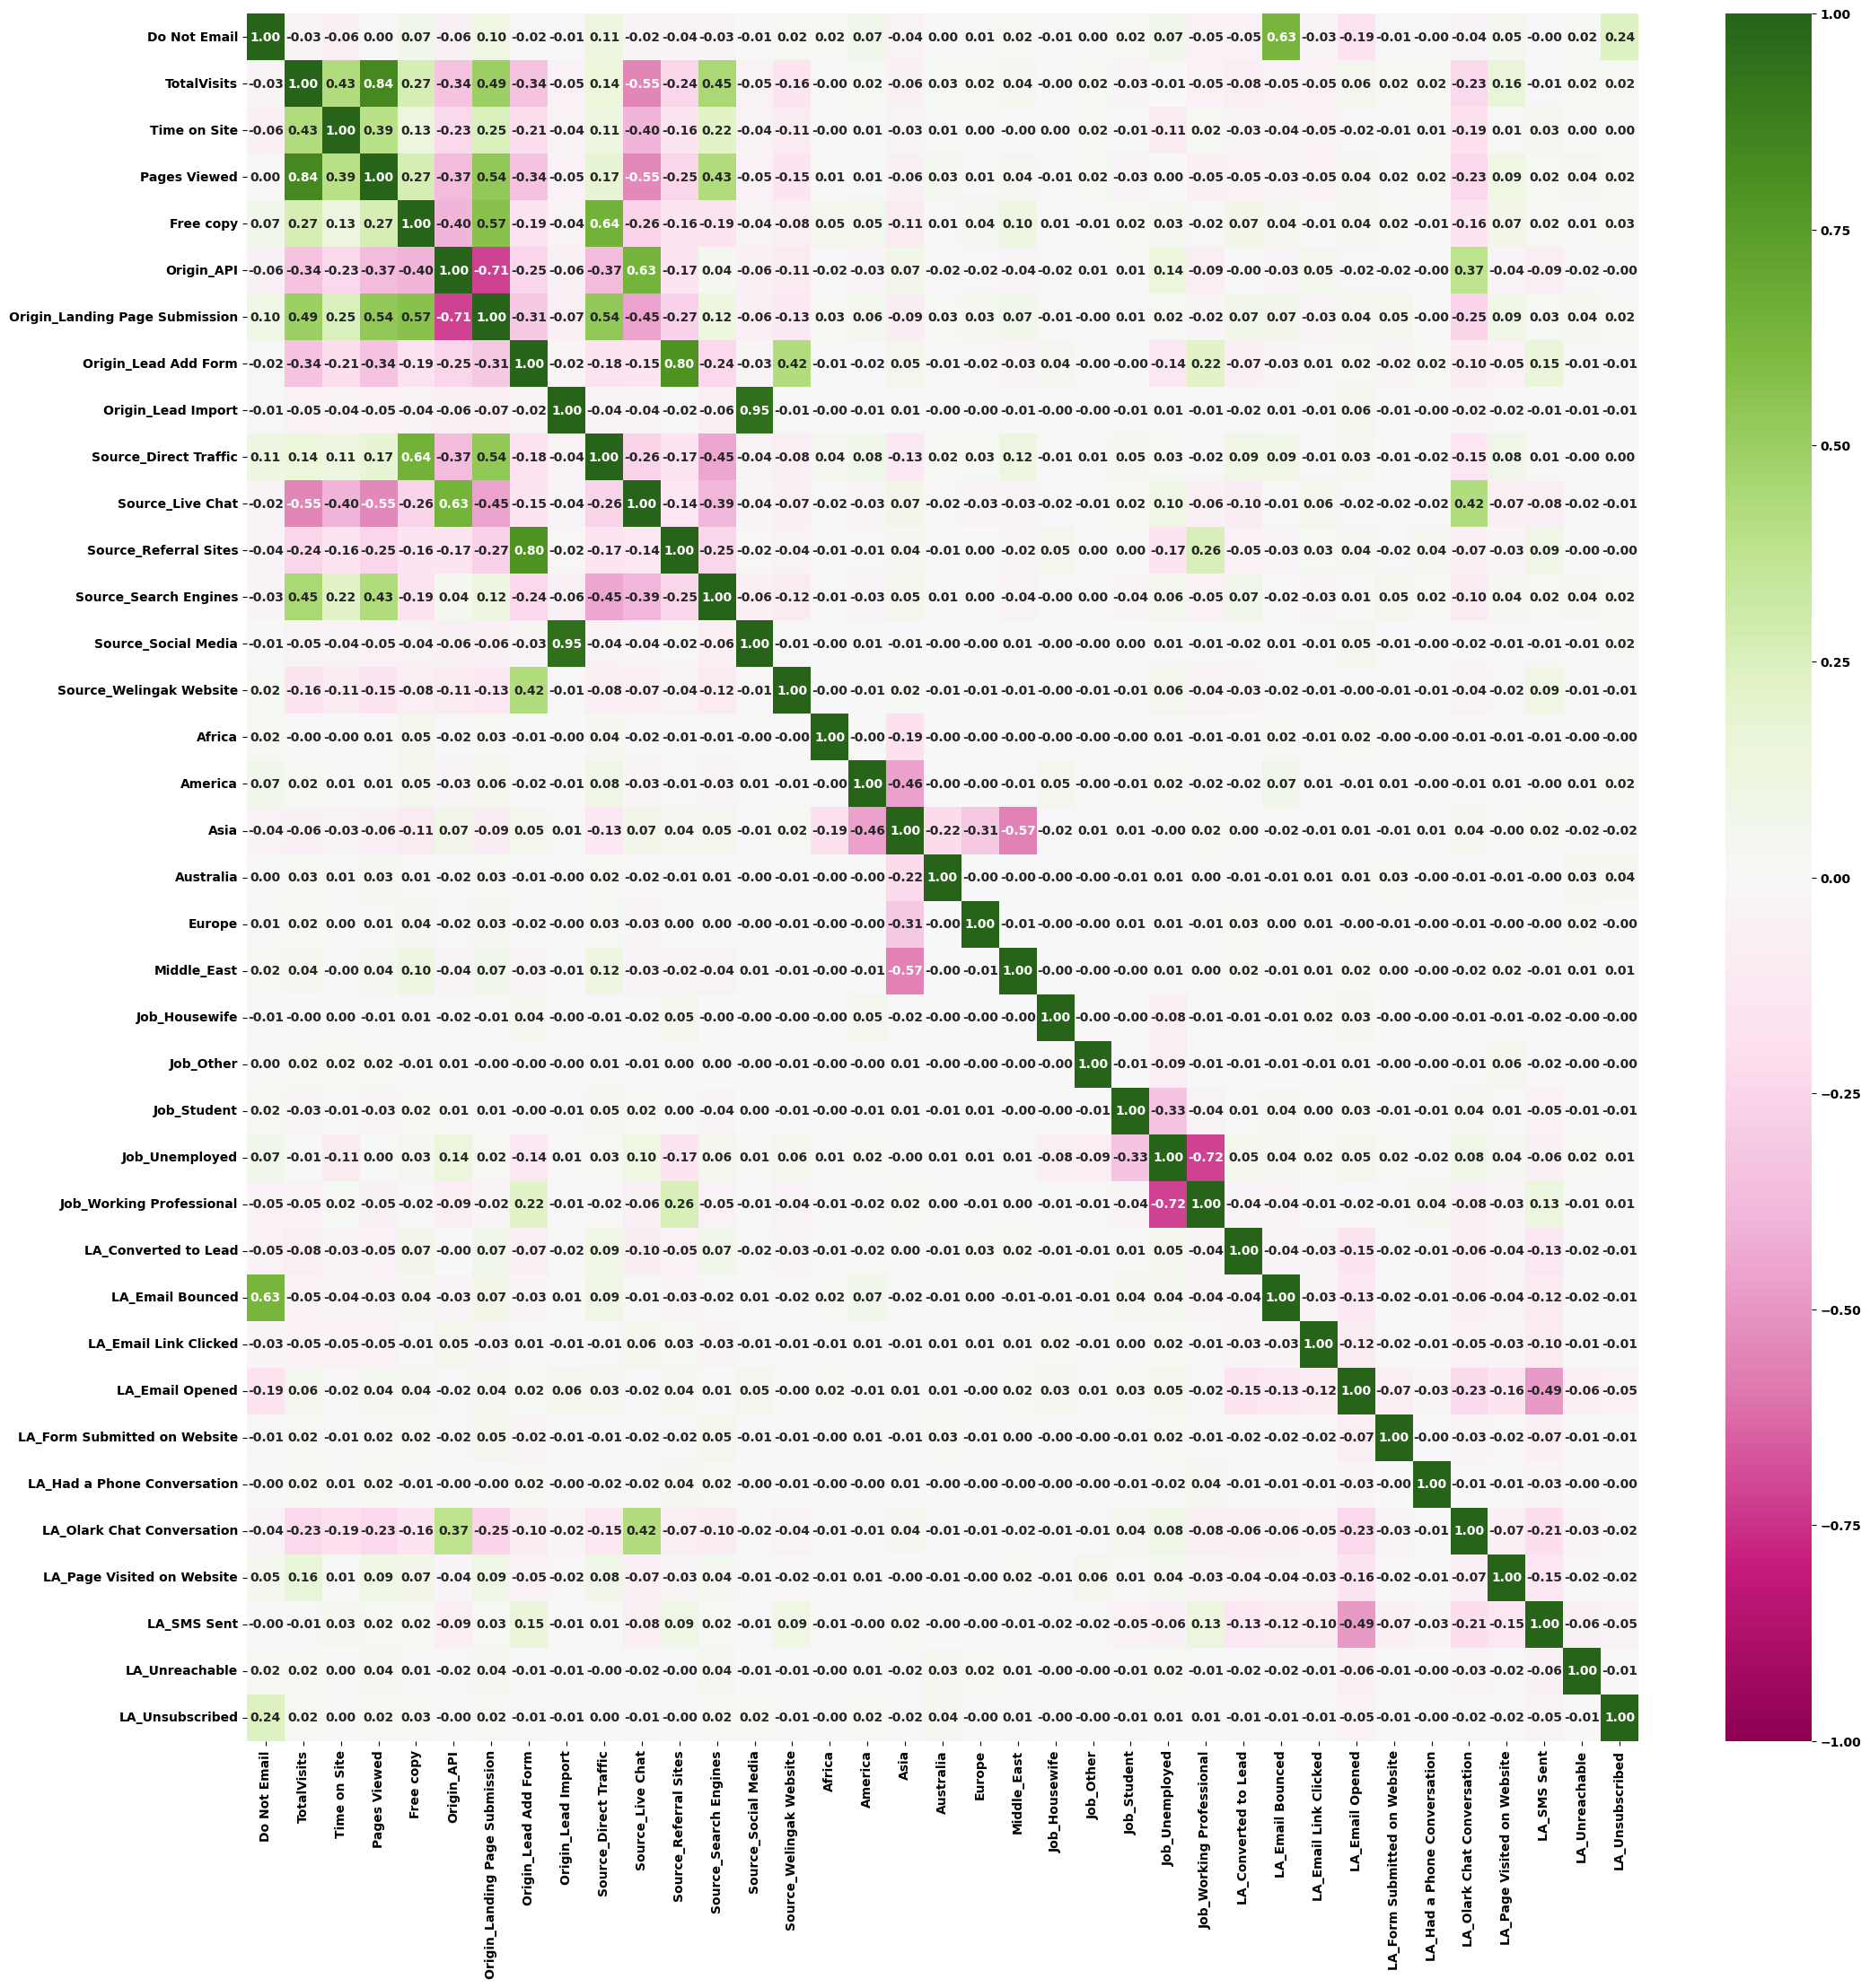

In [53]:
# Visualizing correlation among the features
plt.figure(figsize=(25,25))
sns.heatmap(X_train_sm.corr() , annot = True, vmin = '-1' , cmap = 'PiYG', fmt = '0.2f')
plt.show()

We observe a high correlation among the features, we will address this by using Variance Inflation Factor (VIF) during the model creation process.

## 6. Model Building

In [54]:
# Importing necesary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, confusion_matrix

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Let's leverage Recursive Feature Elimination (RFE) to identify the optimal features for our model, given the complexity of handling multiple features manually.

### 6.1. Recursive Feature Elimination (RFE)

In [55]:
# Initiating RFE using Logistic regression model
logreg = LogisticRegression(random_state = 31)
rfe = RFE(estimator =logreg, n_features_to_select = 20)

# Fitting RFE
rfe.fit(X_train_sm, y_train_sm)

#  Shortlisting the suggested columns
sug_col = X_train_sm.columns[rfe.support_]

# Viewing the features chosen by RFE
list(zip(X_train_sm.columns, rfe.support_ , rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 16),
 ('Time on Site', True, 1),
 ('Pages Viewed', False, 15),
 ('Free copy', False, 18),
 ('Origin_API', True, 1),
 ('Origin_Landing Page Submission', True, 1),
 ('Origin_Lead Add Form', True, 1),
 ('Origin_Lead Import', True, 1),
 ('Source_Direct Traffic', True, 1),
 ('Source_Live Chat', False, 6),
 ('Source_Referral Sites', True, 1),
 ('Source_Search Engines', True, 1),
 ('Source_Social Media', True, 1),
 ('Source_Welingak Website', False, 17),
 ('Africa', False, 5),
 ('America', False, 9),
 ('Asia', False, 13),
 ('Australia', False, 8),
 ('Europe', False, 14),
 ('Middle_East', False, 12),
 ('Job_Housewife', False, 10),
 ('Job_Other', True, 1),
 ('Job_Student', True, 1),
 ('Job_Unemployed', True, 1),
 ('Job_Working Professional', False, 11),
 ('LA_Converted to Lead', True, 1),
 ('LA_Email Bounced', True, 1),
 ('LA_Email Link Clicked', True, 1),
 ('LA_Email Opened', True, 1),
 ('LA_Form Submitted on Website', True, 1),
 ('LA_Had a P

`                                                                     Model 1                                                                          `

Let's proceed with building our initial model using the Statsmodels library to examine key statistical aspects, including p-values and Variance Inflation Factors (VIFs).

In [56]:
## Building logistic regression model using Statsmodels
# Adding constant
X_train = sm.add_constant(X_train_sm[sug_col])
y_train = y_train_sm

# Initiating the model
logreg = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model1 = logreg.fit()

# Viewing model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7992
Model:                            GLM   Df Residuals:                     7971
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3003.7
Date:                Wed, 14 Aug 2024   Deviance:                       6007.4
Time:                        13:37:55   Pearson chi2:                 1.16e+04
No. Iterations:                    25   Pseudo R-squ. (CS):             0.4699
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             29.4443   1.33e+04      0.002      0.998    -2.6e+04     2.6e+04
Do Not Email                      -1.4756      0.186     -7.943      0.000      -1.840      -1.111
Time on Site                       1.1823      0.040     29.290      0.000       1.103       1.261
Origin_API                       -24.6860   1.33e+04     -0.002      0.999    -2.6e+04     2.6e+04
Origin_Landing Page Submission   -24.7479   1.33e+04     -0.002      0.999    -2.6e+04     2.6e+04
Origin_Lead Add Form             -20.4718   1.33e+04     -0.002      0.999    -2.6e+04     2.6e+04
Origin_Lead Import               -24.6018   1.33e+04     -0.002      0.999    -2.6e+04     2.6e+04
Source_Direct Traffic             -1.9139      0.132    -14.537      0.000      -2.172      -1.656
Source_Referral Sites             -1.8351      0.287     -6.402      0.000      -2.397      -1.273
Source_Search Engines             -1.6370      0.105    -15.552      0.000      -1.843      -1.431
Source_Social Media               -1.2898      1.164     -1.108      0.268      -3.572       0.992
Job_Other                         -2.2672      0.744     -3.048      0.002      -3.725      -0.809
Job_Student                       -2.7371      0.289     -9.476      0.000      -3.303      -2.171
Job_Unemployed                    -2.8491      0.178    -16.039      0.000      -3.197      -2.501
LA_Converted to Lead              -2.3264      0.199    -11.718      0.000      -2.715      -1.937
LA_Email Bounced                  -2.3433      0.350     -6.690      0.000      -3.030      -1.657
LA_Email Link Clicked             -2.1067      0.208    -10.109      0.000      -2.515      -1.698
LA_Email Opened                   -1.3503      0.073    -18.437      0.000      -1.494      -1.207
LA_Form Submitted on Website      -2.3126      0.352     -6.570      0.000      -3.002      -1.623
LA_Olark Chat Conversation        -3.3863      0.162    -20.901      0.000      -3.704      -3.069
LA_Page Visited on Website        -1.9477      0.164    -11.892      0.000      -2.269      -1.627
==================================================================================================
"""

### 6.2. VIF

In [57]:
def variance():
    vif = pd.DataFrame()
    vif_data = X_train.drop('const' , axis = 1)
    vif['Features'] = vif_data.columns
    vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif['VIF'] = round(vif['VIF'] , 2)
    vif = vif.sort_values(by = 'VIF' , ascending = False)
    if vif[vif['VIF'] > 5].size < 1:
        print('All the VIF values are below 5!')
    else:
        print(vif[vif['VIF'] > 5])

variance()

                          Features   VIF
5               Origin_Lead Import  9.75
9              Source_Social Media  9.71
12                  Job_Unemployed  7.17
3   Origin_Landing Page Submission  6.78


- We have 5 features that are insignificant as per p-value.
- There are around 4 variables with high VIF, including 'Origin_Lead Import'.
- Therefore, let's drop the 'Origin_Lead Import' column and rebuild the model since it is both insignificant and also has the highest VIF value.

`                                                                     Model 2                                                                          `

In [58]:
## Model 2
# Dropping the column - Origin_Lead Import
X_train.drop('Origin_Lead Import' , inplace = True, axis = 1)

# Initiating the model
logreg = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model2 = logreg.fit()

# Viewing model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7992
Model:                            GLM   Df Residuals:                     7972
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3009.9
Date:                Wed, 14 Aug 2024   Deviance:                       6019.8
Time:                        13:37:55   Pearson chi2:                 1.19e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4690
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              8.8356      0.745     11.864      0.000       7.376      10.295
Do Not Email                      -1.4696      0.186     -7.900      0.000      -1.834      -1.105
Time on Site                       1.1849      0.040     29.357      0.000       1.106       1.264
Origin_API                        -4.0695      0.722     -5.637      0.000      -5.484      -2.655
Origin_Landing Page Submission    -4.1281      0.722     -5.721      0.000      -5.542      -2.714
Origin_Lead Add Form               0.1463      0.781      0.187      0.851      -1.384       1.677
Source_Direct Traffic             -1.9218      0.132    -14.606      0.000      -2.180      -1.664
Source_Referral Sites             -1.8385      0.287     -6.411      0.000      -2.401      -1.276
Source_Search Engines             -1.6434      0.105    -15.627      0.000      -1.850      -1.437
Source_Social Media               -5.1364      0.803     -6.395      0.000      -6.711      -3.562
Job_Other                         -2.2683      0.744     -3.050      0.002      -3.726      -0.811
Job_Student                       -2.7070      0.289     -9.368      0.000      -3.273      -2.141
Job_Unemployed                    -2.8498      0.178    -16.051      0.000      -3.198      -2.502
LA_Converted to Lead              -2.3305      0.199    -11.734      0.000      -2.720      -1.941
LA_Email Bounced                  -2.3572      0.351     -6.725      0.000      -3.044      -1.670
LA_Email Link Clicked             -2.1119      0.208    -10.132      0.000      -2.520      -1.703
LA_Email Opened                   -1.3567      0.073    -18.531      0.000      -1.500      -1.213
LA_Form Submitted on Website      -2.3170      0.352     -6.581      0.000      -3.007      -1.627
LA_Olark Chat Conversation        -3.3894      0.162    -20.912      0.000      -3.707      -3.072
LA_Page Visited on Website        -1.9506      0.164    -11.897      0.000      -2.272      -1.629
==================================================================================================
"""

In [59]:
# Checking VIF
variance()

                          Features   VIF
11                  Job_Unemployed  7.16
3   Origin_Landing Page Submission  6.74


All the variables are significant as per p-value except for 'Origin_Lead Add Form', let us drop the feature and create our next model.

`                                                                     Model 3                                                                          `

In [60]:
## Model 3
# Dropping the column - Origin_Lead Add Form
X_train.drop('Origin_Lead Add Form' , inplace = True, axis = 1)


# Initiating the model
logreg = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model3 = logreg.fit()

# Viewing model summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7992
Model:                            GLM   Df Residuals:                     7973
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3009.9
Date:                Wed, 14 Aug 2024   Deviance:                       6019.9
Time:                        13:37:56   Pearson chi2:                 1.19e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4690
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              8.9606      0.344     26.019      0.000       8.286       9.636
Do Not Email                      -1.4685      0.186     -7.901      0.000      -1.833      -1.104
Time on Site                       1.1846      0.040     29.375      0.000       1.106       1.264
Origin_API                        -4.1953      0.281    -14.942      0.000      -4.746      -3.645
Origin_Landing Page Submission    -4.2533      0.288    -14.781      0.000      -4.817      -3.689
Source_Direct Traffic             -1.9220      0.132    -14.607      0.000      -2.180      -1.664
Source_Referral Sites             -1.8231      0.274     -6.664      0.000      -2.359      -1.287
Source_Search Engines             -1.6435      0.105    -15.626      0.000      -1.850      -1.437
Source_Social Media               -5.2614      0.458    -11.496      0.000      -6.158      -4.364
Job_Other                         -2.2676      0.744     -3.049      0.002      -3.725      -0.810
Job_Student                       -2.7062      0.289     -9.367      0.000      -3.272      -2.140
Job_Unemployed                    -2.8495      0.178    -16.050      0.000      -3.198      -2.502
LA_Converted to Lead              -2.3302      0.199    -11.734      0.000      -2.719      -1.941
LA_Email Bounced                  -2.3561      0.350     -6.727      0.000      -3.043      -1.670
LA_Email Link Clicked             -2.1114      0.208    -10.133      0.000      -2.520      -1.703
LA_Email Opened                   -1.3565      0.073    -18.531      0.000      -1.500      -1.213
LA_Form Submitted on Website      -2.3165      0.352     -6.581      0.000      -3.007      -1.627
LA_Olark Chat Conversation        -3.3892      0.162    -20.912      0.000      -3.707      -3.072
LA_Page Visited on Website        -1.9505      0.164    -11.898      0.000      -2.272      -1.629
==================================================================================================
"""

In [61]:
# Checking VIF
variance()

                          Features   VIF
10                  Job_Unemployed  6.16
3   Origin_Landing Page Submission  6.08


After removing the 'Origin_Lead Add Form' column, the remaining features have become significant. However, we still have two variables with high multicollinearity, so we'll drop them one at a time.

`                                                                     Model 4                                                                          `

In [62]:
# Model 4
# Dropping the column - Origin_Landing Page Submission
X_train.drop('Origin_Landing Page Submission' , inplace = True, axis = 1)


# Initiating the model
logreg = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model4 = logreg.fit()

# Viewing model summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7992
Model:                            GLM   Df Residuals:                     7974
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3226.0
Date:                Wed, 14 Aug 2024   Deviance:                       6451.9
Time:                        13:37:56   Pearson chi2:                 9.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4395
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            5.7490      0.209     27.568      0.000       5.340       6.158
Do Not Email                    -1.3100      0.167     -7.822      0.000      -1.638      -0.982
Time on Site                     1.1453      0.039     29.157      0.000       1.068       1.222
Origin_API                      -0.7115      0.081     -8.743      0.000      -0.871      -0.552
Source_Direct Traffic           -2.8145      0.122    -23.109      0.000      -3.053      -2.576
Source_Referral Sites            0.5899      0.151      3.905      0.000       0.294       0.886
Source_Search Engines           -2.1516      0.099    -21.743      0.000      -2.346      -1.958
Source_Social Media             -2.1161      0.364     -5.810      0.000      -2.830      -1.402
Job_Other                       -2.1972      0.720     -3.051      0.002      -3.609      -0.786
Job_Student                     -2.7927      0.283     -9.879      0.000      -3.347      -2.239
Job_Unemployed                  -2.9229      0.176    -16.590      0.000      -3.268      -2.578
LA_Converted to Lead            -2.4305      0.198    -12.288      0.000      -2.818      -2.043
LA_Email Bounced                -2.4153      0.318     -7.592      0.000      -3.039      -1.792
LA_Email Link Clicked           -2.2327      0.200    -11.148      0.000      -2.625      -1.840
LA_Email Opened                 -1.4125      0.071    -20.023      0.000      -1.551      -1.274
LA_Form Submitted on Website    -2.5368      0.345     -7.348      0.000      -3.213      -1.860
LA_Olark Chat Conversation      -3.5968      0.161    -22.301      0.000      -3.913      -3.281
LA_Page Visited on Website      -2.1537      0.162    -13.288      0.000      -2.471      -1.836
================================================================================================
"""

In [63]:
# Checking VIF
variance()

All the VIF values are below 5!


Now the model 4 has been finalized, lets predict on the train set to check it's metrics

### 6.3. Model Evaluation

In [64]:
# Predicting on the Train set
y_train_proba = model4.predict(X_train)

# Let us apply a common threshold of 0.5 and distinguish the values
y_train_pred = y_train_proba.apply(lambda x: 1 if x>0.5 else 0)

## Metrics
print('\t\tMetrics :  \n')
# Accuracy
print('1. Accuracy :' , round(accuracy_score(y_train, y_train_pred)*100 , 2), '% \n')

# AUC Score
print('2. AUC Score: ', round(roc_auc_score(y_train, y_train_pred)*100 , 2), '% \n')

# Classification report
print('3. Classification Report: \n\n',classification_report(y_train, y_train_pred))

		Metrics :  

1. Accuracy : 81.74 % 

2. AUC Score:  81.74 % 

3. Classification Report: 

               precision    recall  f1-score   support

           0       0.80      0.84      0.82      3996
           1       0.83      0.79      0.81      3996

    accuracy                           0.82      7992
   macro avg       0.82      0.82      0.82      7992
weighted avg       0.82      0.82      0.82      7992



### 6.4. Plotting the ROC Curve

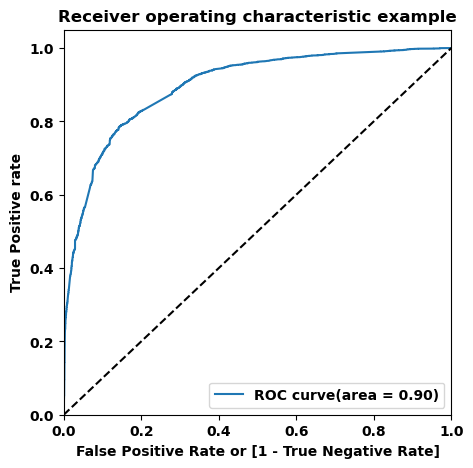

In [65]:
def draw_roc(actual,probs):
    FPR, TPR, thresholds = roc_curve(actual, probs, drop_intermediate = False)
    auc_score = roc_auc_score(actual,probs)
    plt.figure(figsize = [5,5])
    plt.plot(FPR, TPR, label = 'ROC curve(area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

# Plotting the curve
draw_roc(y_train, y_train_proba)

The model has achieved an accuracy of 81.96%, along with a balanced AUC score, indicating that it effectively distinguishes between hot and cold leads. The precision and recall values are well-aligned, leading to a strong F1-score, which confirms that the model is proficient at both correctly identifying potential leads and capturing a high percentage of them. However, there's still room for improvement. By optimizing the threshold, we can further refine the model's ability to classify leads more accurately, ensuring that the separation between hot and cold leads is even more precise.

### 6.5. Finding the Optimal cut off point

In [66]:
# Creating a table with multiple thresholds
optimal_table = pd.DataFrame()
optimal_table['actual'] = y_train
optimal_table['probability'] = y_train_proba

for x in np.arange(0.1, 1.0, 0.1):
    x = round(x, 1)
    optimal_table[x] = optimal_table['probability'].apply(lambda i: 1 if i>x else 0)

# Verify
optimal_table.head()

,actual,probability,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.744756,1,1,1,1,1,1,1,0,0
1,1,0.984094,1,1,1,1,1,1,1,1,1
2,0,0.074061,0,0,0,0,0,0,0,0,0
3,1,0.415410,1,1,1,1,0,0,0,0,0
4,1,0.818599,1,1,1,1,1,1,1,1,0


In [67]:
# Creating a table with the metrics of each threshold
col = [float(x)/10 for x in range(1, 10)]
plot_table = pd.DataFrame(columns = ['thresh','sensi', 'speci' , 'accuracy'])

for i in col:
    con = confusion_matrix(y_train, optimal_table[i])
    TP = con[1][1]
    TN = con[0][0]
    FP = con[0][1]
    FN = con[1][0]
    sensi = TP/(TP + FN)
    speci = TN/(TN + FP)
    accuracy = accuracy_score(y_train, optimal_table[i])
    plot_table.loc[i] = [i, sensi, speci, accuracy]

# Viewing the table
plot_table   

,thresh,sensi,speci,accuracy
0.1,0.1,0.976727,0.379630,0.678178
0.2,0.2,0.952452,0.564815,0.758634
0.3,0.3,0.921672,0.663413,0.792543
0.4,0.4,0.883133,0.716216,0.799675
0.5,0.5,0.794795,0.840090,0.817442
0.6,0.6,0.732733,0.887137,0.809935
0.7,0.7,0.678929,0.919670,0.799299
0.8,0.8,0.522272,0.957457,0.739865
0.9,0.9,0.397147,0.980480,0.688814


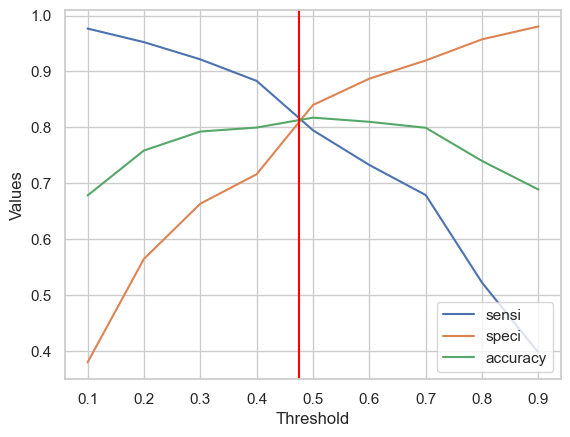

In [68]:
# Plotting the Optimal cut off 
sns.set_theme(style = 'whitegrid')
plot_table[['sensi', 'speci', 'accuracy']].plot()
plt.xlabel('Threshold')
plt.ylabel('Values')
plt.axvline(x = 0.475, color = 'red')
plt.legend(loc = 'lower right')
plt.show()

The plot indicates that the optimal threshold is at 0.475, where accuracy, sensitivity, and specificity all exceed 80%. Hence let us fix the cut off point at `0.475`

In [69]:
# Converting the probability values into binary values accourding to the threshold 0.475
y_train_final = y_train_proba.apply(lambda x: 0 if x <0.475 else 1)

# Creating a function to calculate the metrics
def metric(true, pred):
    con = confusion_matrix(true, pred)
    TP = con[1][1]
    TN = con[0][0]
    FP = con[0][1]
    FN = con[1][0]
    sensi = TP/(TP + FN)
    speci = TN/(TN + FP)
    
    print('Sensitivity: {0} %\nSpecificity: {1} %\n'.format(round(sensi*100, 2) , round(speci*100, 2)))
    print('Classification report: \n\n', classification_report(true, pred))

# Calling the function to calculate metrics
metric(y_train, y_train_final)

Sensitivity: 80.53 %
Specificity: 82.93 %

Classification report: 

               precision    recall  f1-score   support

           0       0.81      0.83      0.82      3996
           1       0.83      0.81      0.82      3996

    accuracy                           0.82      7992
   macro avg       0.82      0.82      0.82      7992
weighted avg       0.82      0.82      0.82      7992



- **Sensitivity (Recall):** The model successfully captures 80.33% of the true positives in the dataset.

- **Specificity:** The model correctly identifies 83.06% of the true negatives, indicating a strong ability to filter out false positives.

- **Accuracy:** With an overall accuracy of 82%, the model effectively distinguishes between positive and negative cases.

- **Precision and Recall Balance:** Both precision and recall scores are well-balanced, with F1-scores close to 82% for both classes, showing the model’s consistency.

- **Classification Stability:** The consistent macro and weighted averages reflect the model's robustness in handling both classes equally well across the training data.

Let us finalize this model and predict on the test set.

## 7. Predicting on the Test set

### 7.1. Preparing the test set

Let's apply the same operations to the test set before building the model, such as standardization and dropping unnecessary columns which were performed on the test set.

In [70]:
# Scaling - Standardisation
X_test[num_var] = scaler.transform(X_test[num_var])

# Removing the variables that were not the part of finalised model 4
X_test = X_test[X_train.columns[1:]]

### 7.2. Evaluation on Test set

In [71]:
## Predicting on the test set
# Adding constant
X_test = sm.add_constant(X_test)

# Predicting
y_test_prob = model4.predict(X_test)

# Converting the result into hot and cold leads based on the optimal threshold
y_test_pred = (y_test_prob).map(lambda x: 0 if x < 0.475 else 1)

## Metrics
metric(y_test, y_test_pred)

Sensitivity: 74.44 %
Specificity: 83.3 %

Classification report: 

               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1347
           1       0.73      0.74      0.74       806

    accuracy                           0.80      2153
   macro avg       0.79      0.79      0.79      2153
weighted avg       0.80      0.80      0.80      2153



The model demonstrated strong performance on the test set,
- Achieving an accuracy of 80%, closely aligning with the training set's 82%. 
- Sensitivity was 74.81% and specificity was 83.07%, reflecting a solid ability to identify true negatives while capturing potential leads.
- Precision for non-converted leads improved to 0.85, although converted leads saw a slight decrease to 0.73.

# Conclusion

Through our analysis of the leads dataset for X Education, we have successfully identified key factors influencing lead conversion rates. By employing data cleaning and imputation techniques, we addressed missing values and potential outliers, ensuring the dataset's integrity for modeling. The exploratory data analysis revealed significant patterns, such as the importance of lead source and activity type, in predicting conversions.

Utilizing logistic regression, we built a model that achieved an accuracy of approximately 80% on the test set, with a sensitivity of 75% and specificity of 83.06%. This indicates the model's robustness in accurately distinguishing between converted and non-converted leads. Furthermore, we established an optimal threshold for classification, enhancing the model's predictive power.

Overall, the insights garnered from this analysis not only assist in effectively prioritizing leads but also pave the way for X Education to focus its sales efforts on high-potential prospects. By implementing the lead scoring model, the company stands to significantly improve its conversion rates, transforming its lead management process and ultimately driving greater revenue growth.